In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import pandas as pd
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics 
import seaborn as sns
import os 
#from palettable.colorbrewer.qualitative import Set1
import sys
import matplotlib.patches as mpatches
from nlcd_user import *
color_algo={'SVR':(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),'ANN':(0.21568627450980393, 0.4941176470588236, 0.7215686274509804),'CIT':(0.3019607843137256, 0.6862745098039216, 0.29019607843137263),'KRR':(0.5960784313725492, 0.3058823529411765, 0.6392156862745098)}

In [2]:
import sys
#res=sys.argv[1]
#cit= sys.argv[2]
res_SVR="KRRLinear.txt"
ind_SVR="KRRind.txt"
ind_CIT="../../LinearDifferentvalues/CIT_testing/results_cit_ind.csv"
res_CIT="../../LinearDifferentvalues/CIT_testing/results_cit_Linear0to1.csv"
#res_ANN="Linear_nlmr_res_ANN.txt"
#ind_ANN="Indp_nlmr_res_ANN.txt"
params="/data/users/cs20s037/CITNonLinear/LinearDifferentvalues/testing_writingvalues_Linear0to1.txt"

In [31]:
fer=open(params,"r")
dataset_names=[]
for i in range(0,200):
    line=fer.readline()
    line="_".join(line.split())
    dataset_names.append(line)
fer.close()


In [8]:
def calculate_precision_recall(causal,ind,iscit=False):
    precision=[]
    recall=[]
    presultscausal=pd.read_csv(causal)
    presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_cit' in pMix.columns:
        pMix.rename(columns={'p_cit':'p_final'}, inplace=True)
    uniq_val=np.unique(pMix['p_final'])
    uniq_val = uniq_val[~np.isnan(uniq_val)]
    #uniq_val=np.insert(uniq_val,0,0)  ## this will consider the left most edge case, adding zero to the start  
    for i in uniq_val:
        pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
        precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
        recall.append(recall_score(pMix['GroundTruth'],pMix['results']))
    #precision=np.insert(precision,0,1)
    #recall=np.insert(recall,0,0)
    #zipped_pairs = zip(precision, recall)
    #sorted_pairs = sorted(zipped_pairs)
    #precision, recall = zip(*sorted_pairs)
    return precision,recall 

    '''

    if iscit==True:
        citpresults= pd.read_csv(res,header=0)
        citpresults = citpresults.iloc[: , :-1]
        citpresults.loc[:,'p_res'] = 1
        citpresultsInd= pd.read_csv(ind,header=0)
        citpresultsInd = citpresultsInd.iloc[: , :-1]
        citpresultsInd.loc[:,'p_res'] = 0
        pCitMix=pd.concat([citpresults,citpresultsInd],ignore_index=True)
        #pCitMix.columns= ['pred','p_TL', 'p_TG', 'p_GL','p_Lind','GroundTruth']
        uniq_val=np.unique(pCitMix['p_cit'])
       
        for i in uniq_val:
            pCitMix['results']=pCitMix.apply (lambda row: 1 if row['p_cit'] <=i   else 0, axis=1)
            precision.append(precision_score(pCitMix['p_res'],pCitMix['results']))
            recall.append(recall_score(pCitMix['p_res'],pCitMix['results']))
    else:
        presults=pd.read_csv(res,header=0,skipfooter=1,engine='python')
        #presults=pd.read_csv(res,header=None,skiprows=1)
        #remove the seed column
        presults = presults.iloc[: , :-1]
        presults.insert(0,column='GroundTruth',value=[1]*len(presults))
        #presultsInd=pd.read_csv(ind,header=None)
        presultsInd=pd.read_csv(ind,header=0,skipfooter=1,engine='python')
        presultsInd = presultsInd.iloc[: , :-1]
        presultsInd.insert(0,column='GroundTruth',value=[0]*len(presultsInd))
        pMix=pd.concat([presults,presultsInd],ignore_index=True)
        #print(pMix.columns)
        uniq_val=np.unique(pMix['p_final'])
        for i in uniq_val:
            pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))
        if version==1:
            pMix['final_p']=pMix.apply(lambda row: max(row[1],row[2],row[5],row[6]),axis=1)
        elif version==2:
            pMix['final_p']=pMix.apply(lambda row: max(row[1],row[3],row[5],row[6]),axis=1)
        elif version==3:
            pMix['final_p']=pMix.apply(lambda row: max(row[1],row[4],row[5],row[6]),axis=1)
        uniq_val=np.unique(pMix['final_p'])
        for i in uniq_val:
            pMix['results']=pMix.apply (lambda row: 1 if row['final_p'] <=i   else 0, axis=1)
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))
            
        '''

        

In [12]:
ptest,rtest=calculate_precision_recall('./results/journal/simulation/cit/Linear1000cit100perm.csv','./results/journal/simulation/cit/Indp1000cit100perm.csv')

In [13]:
ptest,rtest=calculate_precision_recall('./results/journal/simulation/nlcd/LinearANN1000s100perm.csv','./results/journal/simulation/nlcd/IndpANN1000s100perm.csv')

In [2]:
presults=pd.read_csv('./results/journal/simulation/cit/Indp1000cit100perm.csv')
presults=presults.iloc[:,:-2]

In [6]:
presults

,p_cit,p_TL,p_TG,p_GL,p_Lind
0,0.405843,6.834192e-04,0.405843,8.814263e-02,0.231510
1,0.586845,3.194626e-12,0.586845,1.197741e-01,0.307746
2,0.711745,1.791978e-42,0.470043,1.388988e-02,0.711745
3,0.855478,9.139000e-112,0.855478,1.942693e-02,0.455678
4,0.876787,1.596423e-151,0.016665,8.767867e-01,0.171381
...,...,...,...,...,...
95,0.801619,7.002402e-213,0.801619,0.000000e+00,0.440536
96,0.333257,2.402227e-248,0.333257,5.854617e-309,0.173277
97,0.903723,0.000000e+00,0.903723,1.425289e-218,0.580060
98,0.643691,0.000000e+00,0.643691,7.268056e-166,0.336499


In [7]:
version=1
presults=pd.read_csv('./results/compare/Linear300nlcd.csv',header=0)
#presults=pd.read_csv(res,header=None,skiprows=1)
#remove the seed columns
presults = presults.iloc[: , :-2]
#presults.insert(0,column='GroundTruth',value=[1]*len(presults))
#presultsInd=pd.read_csv(ind,header=None)
#presultsInd=pd.read_csv('./results/parallel/newalgo/IndpSVR500s100perm.txt',header=0,skipfooter=1)
#presultsInd = presultsInd.iloc[: , :-1]
#presultsInd.insert(0,column='GroundTruth',value=[0]*len(presultsInd))
#pMix=pd.concat([presults,presultsInd],ignore_index=True)
#if version==1:
#    pMix['final_p']=pMix.apply(lambda row: max(row[1],row[2],row[5],row[6]),axis=1)
#elif version==2:
#    pMix['final_p']=pMix.apply(lambda row: max(row[1],row[3],row[5],row[6]),axis=1)
#elif version==3:
#    pMix['final_p']=pMix.apply(lambda row: max(row[1],row[4],row[5],row[6]),axis=1)

In [8]:
presults

,LB_p,LA|Bv1,LA|Bv2,LA|Bv3,AB|L,LindB|A,OSt2v2,OSt2v3,OSt4
0,0.274510,0.039216,0.254902,0.039216,0.205882,0.715686,0.441291,0.451827,0.441291
1,0.058824,0.872549,0.039216,0.931373,0.441176,0.088235,0.469502,0.427362,0.469502
2,0.754902,0.039216,0.745098,0.186275,0.009804,0.352941,0.446243,0.473322,0.446243
3,0.274510,0.205882,0.696078,0.627451,0.009804,0.068627,0.456065,0.466263,0.456065
4,0.029412,0.656863,0.009804,0.715686,0.009804,0.029412,0.483334,0.430877,0.483334
...,...,...,...,...,...,...,...,...,...
95,0.009804,0.009804,0.607843,0.009804,0.009804,0.009804,0.307969,0.372592,0.307969
96,0.009804,0.009804,0.735294,0.009804,0.009804,0.009804,0.310175,0.376329,0.310175
97,0.009804,0.009804,0.460784,0.009804,0.009804,0.009804,0.316189,0.405582,0.316189
98,0.009804,0.009804,0.921569,0.009804,0.009804,0.009804,0.284040,0.360393,0.284040


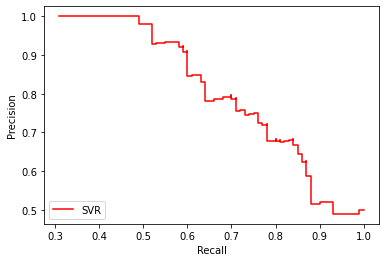

In [62]:
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=ptest, recall=rtest)
disp.plot(ax=ax, name="SVR", color='red')

In [52]:
#to calculate the number of calls for each test and the final calls 
presults=pd.read_csv('./results/compare/Sine300nlcd.csv',header=0)#,dtype={'seed':str})
#remove the seed column 
presults = presults.iloc[: , :-2]
presults['final_v1']=presults.apply(lambda row: max(row[0],row[1],row[4],row[5]),axis=1)
presults['final_v2']=presults.apply(lambda row: max(row[0],row[2],row[4],row[5]),axis=1)
presults['final_v3']=presults.apply(lambda row: max(row[0],row[3],row[4],row[5]),axis=1)

In [53]:
print(sum(presults['final_v1']<0.05))
print(sum(presults['LA|Bv1']<0.05))

36
89


In [54]:
print(sum(presults['final_v2']<0.05))
print(sum(presults['LA|Bv2']<0.05))

36
90


In [55]:
print(sum(presults['final_v3']<0.05))
print(sum(presults['LA|Bv3']<0.05))

36
90


,LB_p,LA|Bv1,LA|Bv2,LA|Bv3,AB|L,LindB|A,OSt2v2,OSt2v3,OSt4
0,0.264706,0.745098,0.333333,0.058824,0.372549,0.303922,0.431693,0.438001,0.435401
1,0.264706,0.372549,0.843137,0.441176,0.009804,0.813725,0.466124,0.467440,0.472615
2,0.303922,0.421569,0.843137,0.500000,0.009804,0.039216,0.473217,0.480000,0.472115
3,0.578431,0.333333,0.852941,0.715686,0.009804,0.029412,0.475872,0.477280,0.468411
4,0.392157,0.588235,0.990196,0.931373,0.009804,0.019608,0.471787,0.477788,0.470505
...,...,...,...,...,...,...,...,...,...
95,0.009804,0.274510,0.029412,0.019608,0.009804,0.009804,0.001924,0.002445,0.001445
96,0.009804,0.088235,0.029412,0.098039,0.009804,0.009804,0.002825,0.003103,0.000379
97,0.009804,0.333333,0.009804,0.009804,0.009804,0.009804,0.000672,0.001085,0.000465
98,0.009804,0.803922,0.107843,0.274510,0.009804,0.009804,0.002472,0.002130,0.001512


In [78]:
def make_table(res,ind,permutations=100,iscit=False):
    precision=[]
    recall=[]
    TN=[]
    FN=[]
    FP=[]
    TP=[]
    if iscit==True:
        citpresults= pd.read_csv(res,skiprows=[1])
        citpresults.loc[:,'p_res'] = 1
        citpresultsInd= pd.read_csv(ind,skiprows=[1])
        citpresultsInd.loc[:,'p_res'] = 0
        pCitMix=pd.concat([citpresults,citpresultsInd],ignore_index=True)
        pCitMix.columns= ['pred','p_TL', 'p_TG', 'p_GL','p_Lind','GroundTruth']
        uniq_val=np.unique(pCitMix['pred'])
        
        for i in uniq_val:
            pCitMix['results']=pCitMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pCitMix['GroundTruth'], pCitMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pCitMix['GroundTruth'],pCitMix['results']))
            recall.append(recall_score(pCitMix['GroundTruth'],pCitMix['results']))
        
    else:
        presults= pd.read_csv(res,header=None,skiprows=1)
        presults=presults.iloc[:,:-1]
        presults.insert(0,column='Groundtruth',value=[1]*len(presults))
        
        presultsInd=pd.read_csv(ind,header=None,skiprows=1)
        presultsInd = presultsInd.iloc[: , :-1]
        presultsInd.insert(0,column='Groundtruth',value=[0]*len(presultsInd))

        pMix=pd.concat([presults,presultsInd],ignore_index=True)
        pMix.columns= ['GroundTruth','p_L->A', 'p_L->B', 'conditional','p_L->A|B']
        pMix['pred']=pMix.apply (lambda row: max(row[1],row[2],row[3],row[4]) , axis=1) 
        pMix['pred']=pMix.apply (lambda row: (row['pred']*permutations+1)/(permutations+2) , axis=1)
        uniq_val=np.unique(pMix['pred']).sort()
        for i in uniq_val:
            pMix['results']=pMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pMix['GroundTruth'], pMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))
    
    table=pd.DataFrame(np.column_stack([uniq_val,TP,FP,TN,FN,precision,recall]),columns=['p cutoffs','TP','FP','TN','FN','precision','recall'])
            
    return table

In [15]:
nlcd_table=make_table("./results/nlcor_yeast/causal350p100.txt","./results/nlcor_yeast/indep350p100.txt")


In [16]:
nlcd_table.to_csv("./results/nlcor_yeast/nlcd_prtable.csv",index=False)

In [10]:
cit_table=make_table("./results/nlcor_yeast/yeastcausal350cit.csv","./results/nlcor_yeast/yeastindp350cit.csv",iscit=True)

In [12]:
cit_table.to_csv("./results/nlcor_yeast/cit_prtable.csv",index=False)

In [31]:
#precision_nlmr_SVR,recall_nlmr_SVR= calculate_precision_recall("./initialtable/SineSVR300.txt","./initialtable/IndpSVR300.txt")
#precision_nlmr_ANN,recall_nlmr_ANN= calculate_precision_recall("./initialtable/SineANN300.txt","./initialtable/IndpANN300.txt")
#precision_nlmr_KRR,recall_nlmr_KRR= calculate_precision_recall("./initialtable/SineKRR300.txt","./initialtable/IndpKRR300.txt")
#precision_CIT,recall_CIT= calculate_precision_recall("Sine300cit.csv","Indp300cit.csv",True)
precision_nlmr_SVR,recall_nlmr_SVR= calculate_precision_recall("./results/parallel/initialtable/LinearSVR1000s100perm.txt","./results/parallel/initialtable/IndpSVR1000s100perm.txt")
precision_nlmr_ANN,recall_nlmr_ANN= calculate_precision_recall("./results/parallel/initialtable/LinearANN1000s100perm.txt","./results/parallel/initialtable/IndpANN1000s100perm.txt")
precision_nlmr_KRR,recall_nlmr_KRR= calculate_precision_recall("./results/parallel/initialtable/LinearKRR1000s100perm.txt","./results/parallel/initialtable/IndpKRR1000s100perm.txt")
precision_CIT,recall_CIT= calculate_precision_recall("./results/withoutparallel/initialtable/Linear1000cit.csv","./results/withoutparallel/initialtable/Indp1000cit.csv",True)

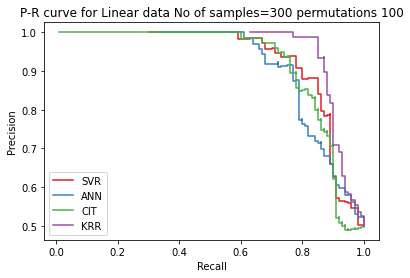

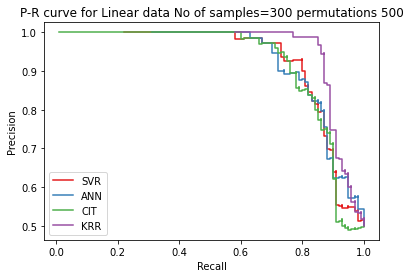

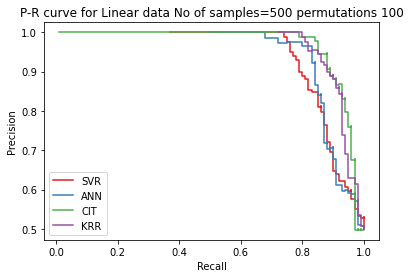

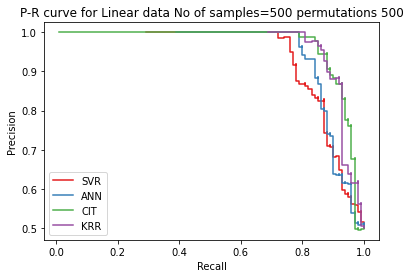

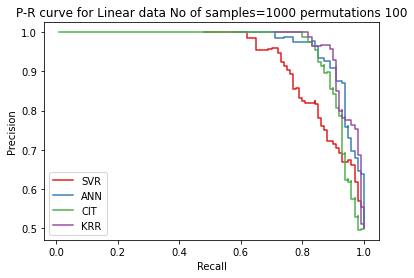

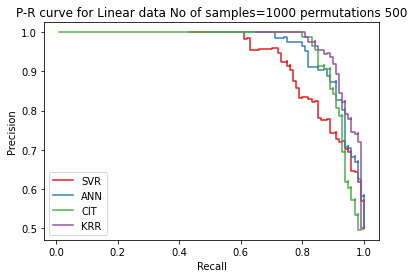

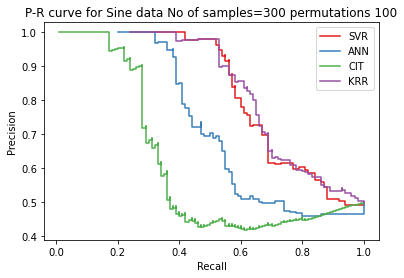

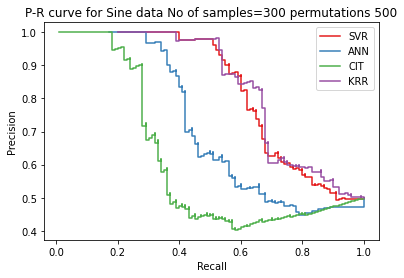

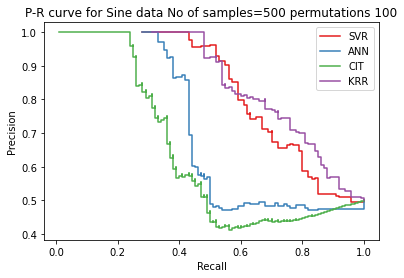

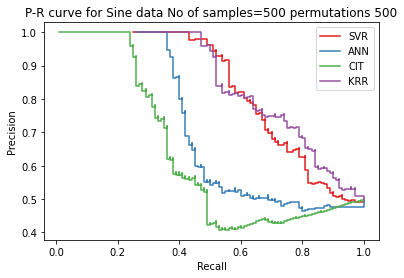

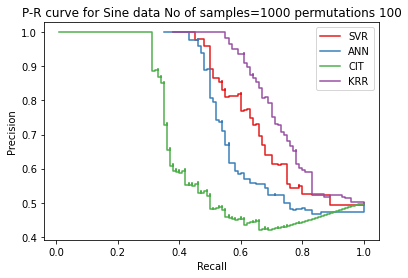

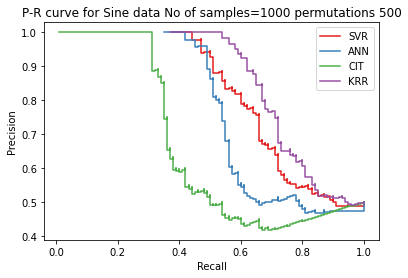

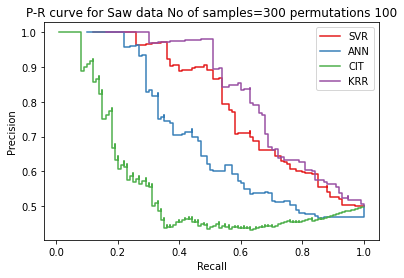

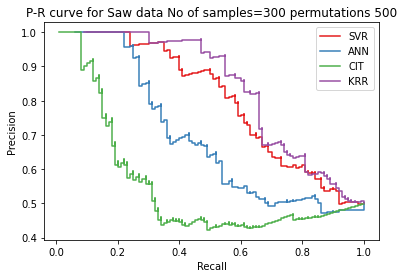

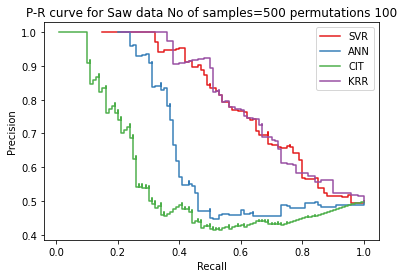

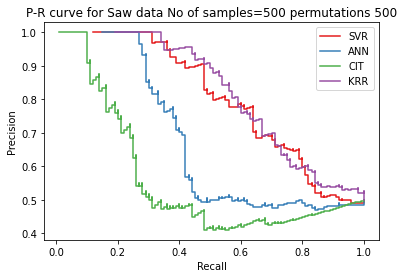

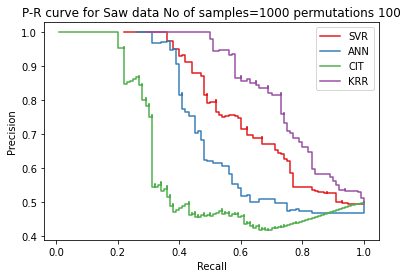

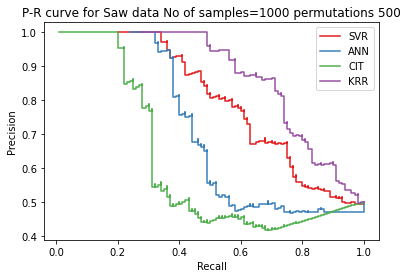

In [15]:
#going to automate both the process 
for i in ['Linear','Sine','Saw']:
    for j in ['300','500','1000']:
        for k in ['100','500']:
            precision_nlmr_SVR,recall_nlmr_SVR= calculate_precision_recall("./results/journal/simulation/nlcd/"+i+"SVR"+j+"s"+k+"perm.csv","./results/journal/simulation/nlcd/IndpSVR"+j+"s"+k+"perm.csv")
            precision_nlmr_KRR,recall_nlmr_KRR= calculate_precision_recall("./results/journal/simulation/nlcd/"+i+"KRR"+j+"s"+k+"perm.csv","./results/journal/simulation/nlcd/IndpKRR"+j+"s"+k+"perm.csv")
            precision_nlmr_ANN,recall_nlmr_ANN= calculate_precision_recall("./results/journal/simulation/nlcd/"+i+"ANN"+j+"s"+k+"perm.csv","./results/journal/simulation/nlcd/IndpANN"+j+"s"+k+"perm.csv")
            precision_CIT,recall_CIT= calculate_precision_recall("./results/journal/simulation/cit/"+i+j+"cit"+k+"perm.csv","./results/journal/simulation/cit/Indp"+j+"cit"+k+"perm.csv")
            fig, ax = plt.subplots()
            disp=PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
            disp.plot(ax=ax, name="SVR", color=color_algo['SVR'])
            disp=PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
            disp.plot(ax=ax,name="ANN",color=color_algo['ANN'])
            disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
            disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp.plot(ax=ax,name="KRR",color=color_algo['KRR'])
            ax.legend( loc="best")
            ax.set_title("P-R curve for "+i+" data No of samples="+j+" permutations "+k)
            #plt.savefig("./results/parallel/plots/"+i+j+"perm"+k+".png")

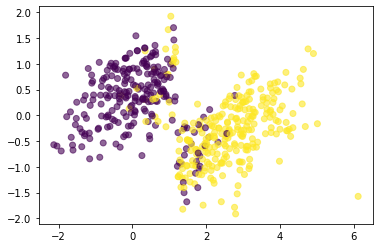

In [6]:
########## Figure 2 ############ read the dataset to visualize the data 
dflinear=read_data("./data/Linear500.txt") # going to read the data with the 52nd index 
dfsine=read_data("./data/Sine500.txt") # going to read the data with the 54th index
dfsaw=read_data("./data/Saw500.txt") # going to read the data with the 54th index 
#plt.scatter(dflinear[52][1],dflinear[52][2],c=dflinear[52][0],alpha=0.6)
#plt.scatter(dflinear[52][1],dflinear[52][2],c=dflinear[52][0],alpha=0.6)
plt.scatter(dfsaw[54][1],dfsaw[54][2],c=dfsaw[54][0],alpha=0.6)

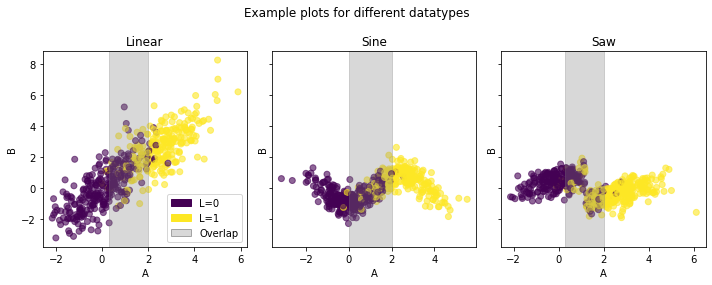

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

norows = 1
nocols = 3

fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharey=True, figsize=(10, 4))
fig.suptitle('Example plots for different datatypes')

curr_ax = ax[0]
plot_index = 0
scatter = curr_ax.scatter(dflinear[52][1], dflinear[52][2], c=dflinear[52][0], cmap='viridis', alpha=0.6)
shade = curr_ax.axvspan(xmin=0.3, xmax=2, alpha=0.3, color='gray')  # Add shaded area
curr_ax.set_xlabel('A')
curr_ax.set_ylabel('B')
curr_ax.set_title('Linear')
# Create custom legend handles with correct colors
unique_labels = set(dfsaw[54][0])
num_labels = len(unique_labels)
colors = plt.cm.get_cmap('viridis', num_labels)(range(num_labels))
cmap = ListedColormap(colors)
legend_handles = [mpatches.Patch(color=color, label=f'L={label}') for color, label in zip(colors, unique_labels)]

# Create legend handles and labels for the shaded area
shade_handle = mpatches.Patch(facecolor='gray', edgecolor='black', alpha=0.3, label='Shaded Area')

# Combine legend handles and labels
handles = legend_handles + [shade_handle]
labels = ['L=0', 'L=1', 'Overlap']

# Add the combined legend to the subplot
curr_ax.legend(handles, labels, loc='lower right')

curr_ax = ax[1]
plot_index += 1
scatter = curr_ax.scatter(dfsine[54][1], dfsine[54][2], c=dfsine[54][0], cmap='viridis', alpha=0.6)
shade = curr_ax.axvspan(xmin=0, xmax=2, alpha=0.3, color='gray')  # Add shaded area
curr_ax.set_xlabel('A')
curr_ax.set_ylabel('B')
curr_ax.set_title('Sine')

curr_ax = ax[2]
plot_index += 1
scatter = curr_ax.scatter(dfsaw[54][1], dfsaw[54][2], c=dfsaw[54][0], cmap='viridis', alpha=0.6)
shade = curr_ax.axvspan(xmin=0.3, xmax=2, alpha=0.3, color='gray')  # Add shaded area
curr_ax.set_xlabel('A')
curr_ax.set_ylabel('B')
curr_ax.set_title('Saw')



plt.tight_layout()
plt.savefig("./results/journal/plots/fig2_example.png", bbox_inches='tight', dpi=1200)
plt.savefig('./results/journal/plots/fig2_example.svg', bbox_inches='tight', format='svg', dpi=1200)

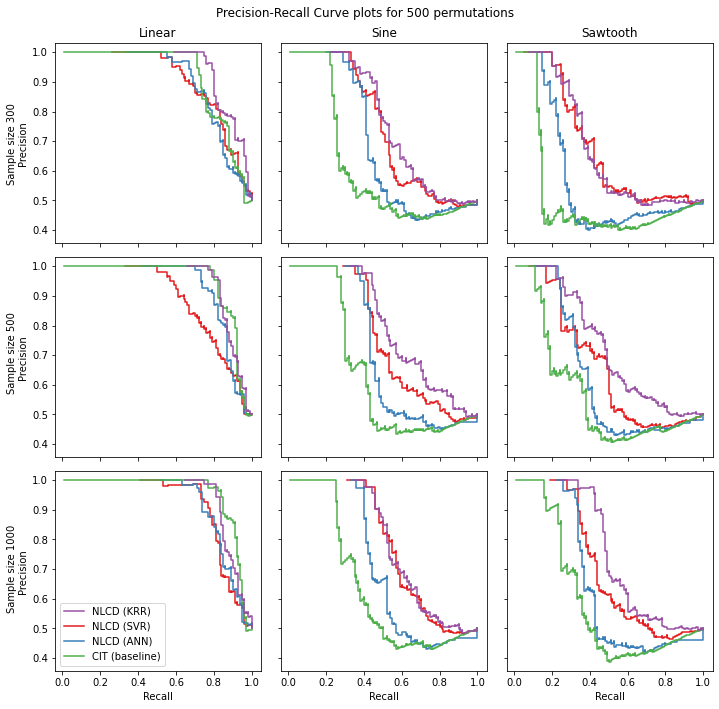

In [18]:
### Figure 2 ################

norows=3
nocols=3
fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
#fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
#fig.text(0.22, 1, 'Linear', ha='center')
#fig.text(0.52, 1, 'Sine', ha='center')
#fig.text(0.85, 1, 'Saw', ha='center')
fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')
plot_index = 0

for i in ['300', '500', '1000'] :
    for j in ['Linear', 'Sine', 'Saw']:
        for k in [ '500']: # put 100 permutations in supplementary 
            precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "SVR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpSVR" + i + "s" + k + "perm.csv")
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "KRR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpKRR" + i + "s" + k + "perm.csv")
            precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "ANN" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpANN" + i + "s" + k + "perm.csv")
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/" + j + i + "cit" + k + "perm.csv", "./results/journal/simulation/cit/Indp" + i + "cit" + k + "perm.csv")

            curr_ax = ax[plot_index // nocols, plot_index % nocols]

            disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
            disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
            disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
            disp.plot(ax=curr_ax, color=color_algo['ANN'])
            disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp.plot(ax=curr_ax, color=color_algo['CIT'])
            disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp.plot(ax=curr_ax, color=color_algo['KRR'])
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            # set datatype as titles 
            if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                curr_ax.set_title('Linear')
            elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title('Sine')
            elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title('Sawtooth')   
            if(plot_index % nocols == 0):   # if its the second row then add the y labels 
                curr_ax.set_ylabel('Precision')
            if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                curr_ax.set_xlabel('Recall')
            if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                xindex=norows-1
                yindex=0
                handles = [ax[xindex, yindex].lines[3],ax[xindex,yindex].lines[0], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[2]]
                labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT (baseline)']
                curr_ax.legend(handles,labels,loc="lower left")

            
            plot_index += 1

#plt.tight_layout()
# Create a common legend
#handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
#labels = ['SVR', 'ANN', 'CIT', 'KRR']
#fig.legend(handles, labels, loc='lower left')

fig.tight_layout()
plt.savefig("./results/journal/plots/fig2.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig2.svg', bbox_inches='tight',format='svg', dpi=1200)


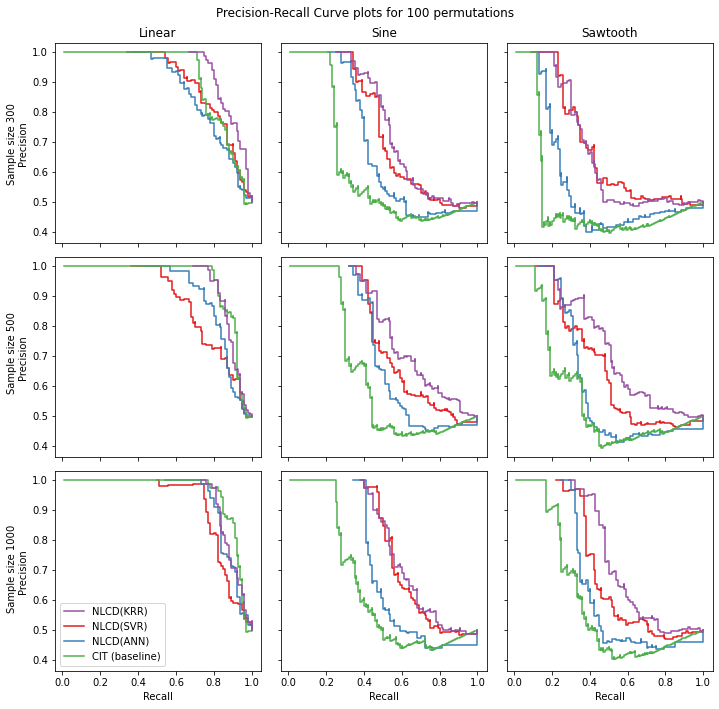

In [70]:
### Figure 2 supplementary ################

norows=3
nocols=3
fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
fig.suptitle("Precision-Recall Curve plots for 100 permutations ")
#fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
#fig.text(0.22, 1, 'Linear', ha='center')
#fig.text(0.52, 1, 'Sine', ha='center')
#fig.text(0.85, 1, 'Saw', ha='center')
fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')

plot_index = 0

for i in ['300', '500', '1000'] :
    for j in ['Linear', 'Sine', 'Saw']:
        for k in [ '100']: # put 100 permutations in supplementary 
            precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "SVR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpSVR" + i + "s" + k + "perm.csv")
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "KRR" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpKRR" + i + "s" + k + "perm.csv")
            precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall("./results/journal/simulation/nlcd/" + j + "ANN" + i + "s" + k + "perm.csv", "./results/journal/simulation/nlcd/IndpANN" + i + "s" + k + "perm.csv")
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/" + j + i + "cit" + k + "perm.csv", "./results/journal/simulation/cit/Indp" + i + "cit" + k + "perm.csv")

            curr_ax = ax[plot_index // nocols, plot_index % nocols]

            disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
            disp.plot(ax=curr_ax, color=color_algo['SVR'])
            disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
            disp.plot(ax=curr_ax, color=color_algo['ANN'])
            disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp.plot(ax=curr_ax, color=color_algo['CIT'])
            disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp.plot(ax=curr_ax, color=color_algo['KRR'])
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title('Linear')
            elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title('Sine')
            elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title('Sawtooth')   
            if(plot_index % nocols == 0):
                curr_ax.set_ylabel('Precision')
            if(plot_index //nocols == (norows-1)):
                curr_ax.set_xlabel('Recall')
            if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                xindex=norows-1
                yindex=0
                handles = [ax[xindex, yindex].lines[3],ax[xindex,yindex].lines[0], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[2]]
                labels = ['NLCD(KRR)','NLCD(SVR)', 'NLCD(ANN)',  'CIT (baseline)']
                curr_ax.legend(handles,labels,loc="lower left")
           

            plot_index += 1

#plt.tight_layout()
# Create a common legend
#handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
#labels = ['SVR', 'ANN', 'CIT', 'KRR']
#fig.legend(handles, labels, loc='lower left')
fig.tight_layout()
plt.savefig("./results/journal/plots/fig_2_suppl_a.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig_2_suppl_a.svg', bbox_inches='tight',format='svg', dpi=1200)


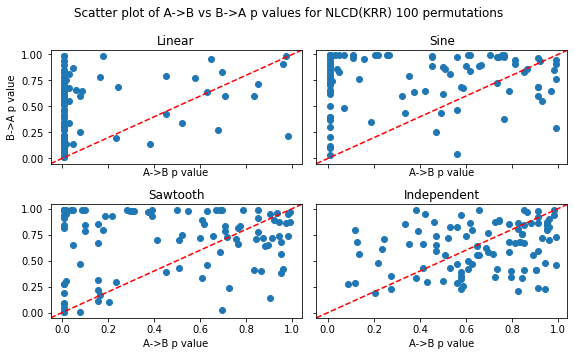

In [8]:
#### Figure 2 supplementary b ###########
norows=2
nocols=2
fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8,5))
fig.suptitle("Scatter plot of A->B vs B->A p values for NLCD(KRR) 100 permutations ")
plot_index=0
for j in ['Linear', 'Sine', 'Saw','Indp']:
    dfcausal=pd.read_csv('./results/journal/2way/'+j+'KRR500s100perm.csv')
    dfrev=pd.read_csv('./results/journal/2way/'+j+'KRR500s100perm_rev.csv')
    curr_ax = ax[plot_index//nocols, plot_index % nocols]
    curr_ax.scatter(dfcausal['p_final'],dfrev['p_final'])
    if(plot_index!=0):
        curr_ax.set_ylabel('')
    elif(plot_index==0 or plot_index==2):
        curr_ax.set_ylabel('B->A p value')
    curr_ax.set_xlabel('A->B p value')
    if(j=='Linear'):
        curr_ax.set_title('Linear')
    elif(j=='Sine'):
        curr_ax.set_title('Sine')
    elif(j=='Saw'):
        curr_ax.set_title('Sawtooth')
    elif(j=='Indp'):
        curr_ax.set_title('Independent')
    curr_ax.axline((0, 0), slope=1,color='red',ls='--')
    plot_index+=1
    
fig.tight_layout()
plt.savefig("./results/journal/plots/fig_2_suppl_b.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig_2_suppl_b.svg', bbox_inches='tight',format='svg', dpi=1200)


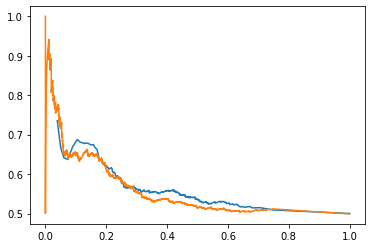

In [4]:
### yeast analysis ################

precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko500/nlcd/yeast_causal.csv", "./results/journal/yeast/wilko500/nlcd/yeast_indp.csv")

precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko/cit/yeast_causal.csv", "./results/journal/yeast/wilko/cit/yeast_indp.csv")
plt.plot(recall_nlmr_KRR,precision_nlmr_KRR)
plt.plot(recall_CIT,precision_CIT)
#filtered_pairs = [(p, r) for p, r in zip(precision_CIT, recall_CIT) if p != 0 ]
#precision_CIT, recall_CIT = zip(*filtered_pairs)

#plt.tight_layout()
# Create a common legend
#handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
#labels = ['SVR', 'ANN', 'CIT', 'KRR']
#fig.legend(handles, labels, loc='lower left')
#plt.savefig("./results/journal/plots/fig2.png",bbox_inches='tight',dpi=1200)
#plt.savefig('./results/journal/plots/fig2.svg', bbox_inches='tight',format='svg', dpi=1200)


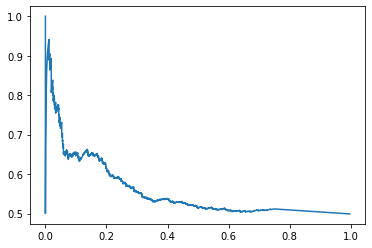

In [81]:
pd.DataFrame({'recall':recall_CIT,'precision':precision_CIT}).to_csv("howard.csv",index=False)

In [44]:
temp

,0,1,2,3,4,5,6,7,8,9,...,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817
0,1.0,1.000000,0.500000,0.666667,0.750000,0.800000,0.833333,0.857143,0.875000,0.888889,...,0.510417,0.510405,0.510929,0.511704,0.499004,1.0,1.0,1.0,1.0,1.0
1,0.0,0.000796,0.000796,0.001591,0.002387,0.003182,0.003978,0.004773,0.005569,0.006364,...,0.740652,0.741448,0.743835,0.747812,0.996022,0.0,0.0,0.0,0.0,0.0


In [5]:
causal="./results/journal/yeast/wilko/cit/yeast_causal.csv"
ind="./results/journal/yeast/wilko/cit/yeast_indp.csv"
precision=[]
recall=[]
presultscausal=pd.read_csv(causal)
presultscausal=presultscausal.iloc[:,:-2]
presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
presultsind=pd.read_csv(ind)
presultsind=presultsind.iloc[:,:-2]
presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
if 'p_cit' in pMix.columns:
    pMix.rename(columns={'p_cit':'p_final'}, inplace=True)
uniq_val=np.unique(pMix['p_final'])
 ## this will consider the left most edge case, adding zero to the start  

In [17]:
uniq_val[2]

1.00863625732947e-18

In [85]:
sum(np.isnan(uniq_val))

5

In [18]:
precision=[]
recall=[]
for i in [1.00863625732947e-18]:
    if(i==0):
        print("yes")
    pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
    precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
    recall.append(recall_score(pMix['GroundTruth'],pMix['results']))

In [19]:
precision

[0.6666666666666666]

In [20]:
recall

[0.0015910898965791568]

In [4]:
pMix

,GroundTruth,p_final,p_LassocB,p_LassocA|B,p_AassocB|L,p_LindB|A,OS Test 4
0,1,0.049020,0.009804,0.009804,0.009804,0.049020,0.432800
1,1,0.009804,0.009804,0.009804,0.009804,0.009804,0.432800
2,1,0.009804,0.009804,0.009804,0.009804,0.009804,0.260948
3,1,0.990196,0.058824,0.009804,0.009804,0.990196,0.260948
4,1,0.990196,0.039216,0.009804,0.009804,0.990196,0.260948
...,...,...,...,...,...,...,...
2509,0,0.862745,0.235294,0.009804,0.098039,0.862745,0.344376
2510,0,0.990196,0.450980,0.009804,0.009804,0.990196,0.344376
2511,0,0.990196,0.088235,0.009804,0.009804,0.990196,0.344376
2512,0,0.049020,0.049020,0.009804,0.009804,0.009804,0.423401


In [6]:

uniq_val=np.unique(pMix['p_final'])


In [17]:
np.insert(uniq_val,0,0)

array([0.      , 0.009804, 0.019608, 0.029412, 0.039216, 0.04902 ,
       0.058824, 0.068627, 0.078431, 0.088235, 0.098039, 0.107843,
       0.117647, 0.127451, 0.137255, 0.147059, 0.156863, 0.166667,
       0.176471, 0.186275, 0.196078, 0.205882, 0.215686, 0.22549 ,
       0.235294, 0.245098, 0.254902, 0.264706, 0.27451 , 0.284314,
       0.294118, 0.303922, 0.313725, 0.323529, 0.333333, 0.343137,
       0.352941, 0.362745, 0.372549, 0.382353, 0.392157, 0.401961,
       0.411765, 0.421569, 0.431373, 0.441176, 0.45098 , 0.460784,
       0.470588, 0.480392, 0.490196, 0.5     , 0.509804, 0.519608,
       0.529412, 0.539216, 0.54902 , 0.558824, 0.568627, 0.578431,
       0.588235, 0.598039, 0.607843, 0.617647, 0.627451, 0.637255,
       0.647059, 0.656863, 0.666667, 0.676471, 0.686275, 0.696078,
       0.705882, 0.715686, 0.72549 , 0.735294, 0.745098, 0.754902,
       0.764706, 0.77451 , 0.784314, 0.794118, 0.803922, 0.813725,
       0.823529, 0.833333, 0.843137, 0.852941, 0.862745, 0.872

In [8]:
pMix['p_final']

0       0.049020
1       0.009804
2       0.009804
3       0.990196
4       0.990196
          ...   
2509    0.862745
2510    0.990196
2511    0.990196
2512    0.049020
2513    0.019608
Name: p_final, Length: 2514, dtype: float64

In [25]:
i=uniq_val[0]
pMix['results']=pMix.apply(lambda row: 1 if row['p_final'] <i   else 0, axis=1)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [32]:
precision,recall,threshold=precision_recall_curve(1-pMix['GroundTruth'], pMix['p_final'])

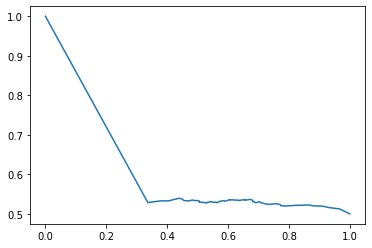

In [33]:
plt.plot(recall, precision)

In [26]:
pMix['results'].value_counts()

0    2514
Name: results, dtype: int64

In [24]:
sum(pMix['GroundTruth'] & pMix['results'])

0

In [ ]:
for i in uniq_val:
    pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
    precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
    recall.append(recall_score(pMix['GroundTruth'],pMix['results']))

In [41]:
saarted=list(precision_CIT)

In [43]:
saarted.sort()

In [44]:
saarted

[0.4990035870864886,
 0.5,
 0.5039755351681957,
 0.5042735042735043,
 0.5042787286063569,
 0.5042839657282742,
 0.5042892156862745,
 0.504375,
 0.5043859649122807,
 0.5043914680050188,
 0.5044563279857398,
 0.5044722719141324,
 0.5044829647340108,
 0.5044937088076693,
 0.5045482110369921,
 0.5045759609517999,
 0.5045815516188149,
 0.5045927740355175,
 0.5045931758530183,
 0.5045984058859595,
 0.504684572142411,
 0.5046904315196998,
 0.5046963055729493,
 0.5047021943573667,
 0.504708097928437,
 0.5047199496538703,
 0.504725897920605,
 0.5047318611987381,
 0.504750593824228,
 0.504756242568371,
 0.5047675804529201,
 0.5047732696897375,
 0.504778972520908,
 0.5047846889952153,
 0.5047904191616767,
 0.5047961630695443,
 0.5048426150121066,
 0.5048484848484849,
 0.5048543689320388,
 0.5048780487804878,
 0.5049079754601227,
 0.5049180327868853,
 0.504924491135916,
 0.5049813200498132,
 0.5049875311720698,
 0.5049937578027466,
 0.5050062578222778,
 0.5050251256281407,
 0.5050314465408805,
 0.

In [30]:
recall_CIT

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0007955449482895784,
 0.0007955449482895784,
 0.0015910898965791568,
 0.002386634844868735,
 0.0031821797931583136,
 0.003977724741447892,
 0.00477326968973747,
 0.005568814638027049,
 0.006364359586316627,
 0.007159904534606206,
 0.007955449482895784,
 0.008750994431185362,
 0.00954653937947494,
 0.010342084327764518,
 0.011137629276054098,
 0.011933174224343675,
 0.012728719172633254,
 0.012728719172633254,
 0.013524264120922832,
 0.014319809069212411,
 0.015115354017501989,
 0.015115354017501989,
 0.015910898965791568,
 0.016706443914081145,
 0.017501988862370723,
 0.018297533810660304,
 0.01909307875894988,
 0.01988862370723946,
 0.01988862370723946,
 0.01988862370723946,
 0.01988862370723946,
 0.020684168655529037,
 0.021479713603818614,
 0.022275258552108195,
 0.023070803500397773,
 0.02386634844868735,
 0.024661893396976928,
 0.024661893396976928,
 0.02545743834526651,
 0.02545743834526651,
 0.026252983293556086,
 0.026252983293556086,
 0.0270485

In [4]:
one=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_causal.csv',header=0)
two=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_causal_rev.csv',header=0)

In [5]:
print(sum((one['p_LassocB']<0.05) & (one['p_final']<0.05)))
print(sum(one['p_LassocB']<0.05))
print(sum(one['p_final']<0.05))

261
865
261


In [6]:
print(sum((two['p_LassocB']<0.05) & (two['p_final']<0.05)))
print(sum(two['p_LassocB']<0.05))
print(sum(two['p_final']<0.05))

171
1138
171


In [7]:
sum(two['p_final']<0.05)

171

In [11]:
oneind=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_indp.csv',header=0)
twoind=pd.read_csv('./results/journal/yeast/wilko/nlcd/yeast_indp_rev.csv',header=0)

In [12]:
print(sum((oneind['p_LassocB']<0.05) & (oneind['p_final']<0.05)))
print(sum(oneind['p_LassocB']<0.05))
print(sum(oneind['p_final']<0.05))

167
727
167


In [17]:
sum(oneind['p_LassocB']<0.05)

727

In [18]:
sum(twoind['p_final']<0.05)

126

In [14]:
one=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_causal.csv',header=0)
two=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_causal_rev.csv',header=0)

In [15]:
print(sum((one['p_TL']<0.05) & (one['p_cit']<0.05)))
print(sum(one['p_TL']<0.05))
print(sum(one['p_cit']<0.05))

393
1073
393


In [37]:
sum(one['p_cit']<0.05)

95

In [16]:
sum(two['p_cit']<0.05)

152

In [19]:
oneind=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_indp.csv',header=0)
twoind=pd.read_csv('./results/journal/yeast/wilko/cit/yeast_indp_rev.csv',header=0)

In [20]:
print(sum((oneind['p_TL']<0.05) & (oneind['p_cit']<0.05)))
print(sum(oneind['p_TL']<0.05))
print(sum(oneind['p_cit']<0.05))

320
1016
320


In [21]:
print(sum((twoind['p_TL']<0.05) & (twoind['p_cit']<0.05)))
print(sum(twoind['p_TL']<0.05))
print(sum(twoind['p_cit']<0.05))

107
1169
107


In [40]:
sum(one['p_cit']<0.05)

50

In [41]:
sum(two['p_cit']<0.05)

11

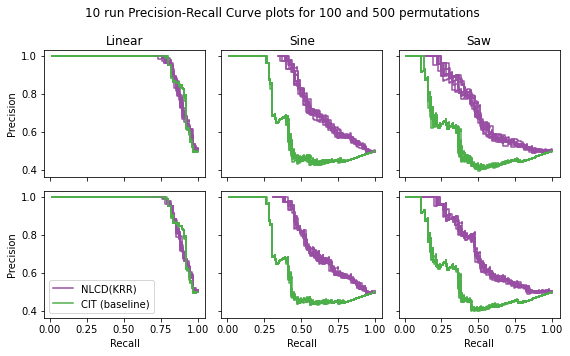

In [9]:
### Figure 2 supplementary c c################

norows=2
nocols=3
fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8,5))
fig.suptitle("10 run Precision-Recall Curve plots for 100 and 500 permutations ")

plot_index = 0

for k in [ '100','500']: 
    for j in ['Linear','Sine','Saw']:
        for i in ['1','2','3','4','5','6','7','8','9','10']:
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/10run/runvariation/nlcd/"+j+"KRR500s" + k +"perm"+i+"run"+".csv", "./results/journal/10run/runvariation/nlcd/IndpKRR500s" + k + "perm"+i+"run"+".csv")
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/10run/runvariation/cit/"+j+"500cit" + k + "perm"+"run"+i+".csv", "./results/journal/10run/runvariation/cit/Indp500cit" + k + "perm"+"run"+i+".csv")

            curr_ax = ax[ plot_index//nocols,plot_index % nocols]

            disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp.plot(ax=curr_ax, color=color_algo['KRR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
            disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp.plot(ax=curr_ax, color=color_algo['CIT'])
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
        if(plot_index // nocols == 0 and plot_index % nocols == 0):
            curr_ax.set_title("Linear")
            curr_ax.set_ylabel("Precision")
        if(plot_index // nocols == 0 and plot_index % nocols == 1):
            curr_ax.set_title("Sine")
        if(plot_index // nocols == 0 and plot_index % nocols == 2):
            curr_ax.set_title("Saw")
        if(plot_index // nocols == 1 ):
            if(plot_index % nocols == 0):
                curr_ax.set_ylabel("Precision")
            curr_ax.set_xlabel("Recall")
            
        if(plot_index // nocols == 1 and plot_index % nocols == 0) :
            xindex=norows-1
            yindex=0
            handles = [curr_ax.lines[0],curr_ax.lines[1]]
            labels = ['NLCD(KRR)','CIT (baseline)']
            curr_ax.legend(handles,labels,loc="lower left")
        
        plot_index += 1
    


fig.tight_layout()
plt.savefig("./results/journal/plots/fig_2_suppl_c.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig_2_suppl_c.svg', bbox_inches='tight',format='svg', dpi=1200)


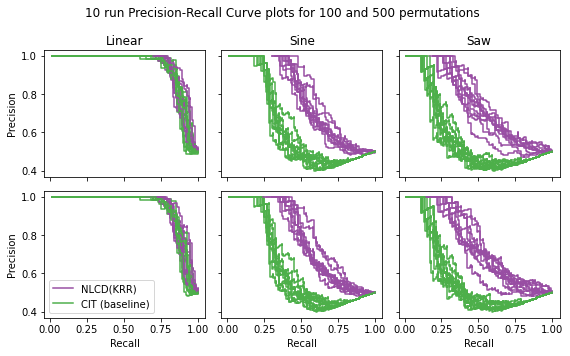

In [10]:
### Figure 2 supplementary d ################

norows=2
nocols=3
fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8,5))
fig.suptitle("10 run Precision-Recall Curve plots for 100 and 500 permutations ")

plot_index = 0

for k in [ '100','500']: 
    for j in ['Linear','Sine','Saw']:
        for i in ['1','2','3','4','5','6','7','8','9','10']:
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/10run/datavariation/nlcd/"+j+"KRR500s" + k +"perm"+i+"run"+".csv", "./results/journal/10run/datavariation/nlcd/IndpKRR500s" + k + "perm"+i+"run"+".csv")
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/10run/datavariation/cit/"+j+"500cit" + k + "perm"+"run"+i+".csv", "./results/journal/10run/datavariation/cit/Indp500cit" + k + "perm"+"run"+i+".csv")

            curr_ax = ax[ plot_index//nocols,plot_index % nocols]

            disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp.plot(ax=curr_ax, color=color_algo['KRR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
            disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp.plot(ax=curr_ax, color=color_algo['CIT'])
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
        if(plot_index // nocols == 0 and plot_index % nocols == 0):
            curr_ax.set_title("Linear")
            curr_ax.set_ylabel("Precision")
        if(plot_index // nocols == 0 and plot_index % nocols == 1):
            curr_ax.set_title("Sine")
        if(plot_index // nocols == 0 and plot_index % nocols == 2):
            curr_ax.set_title("Saw")
        if(plot_index // nocols == 1 ):
            if(plot_index % nocols == 0):
                curr_ax.set_ylabel("Precision")
            curr_ax.set_xlabel("Recall")
            
        if(plot_index // nocols == 1 and plot_index % nocols == 0) :
            xindex=norows-1
            yindex=0
            handles = [curr_ax.lines[0],curr_ax.lines[1]]
            labels = ['NLCD(KRR)','CIT (baseline)']
            curr_ax.legend(handles,labels,loc="lower left")
        
        plot_index += 1
    


fig.tight_layout()
plt.savefig("./results/journal/plots/fig_2_suppl_d.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig_2_suppl_d.svg', bbox_inches='tight',format='svg', dpi=1200)


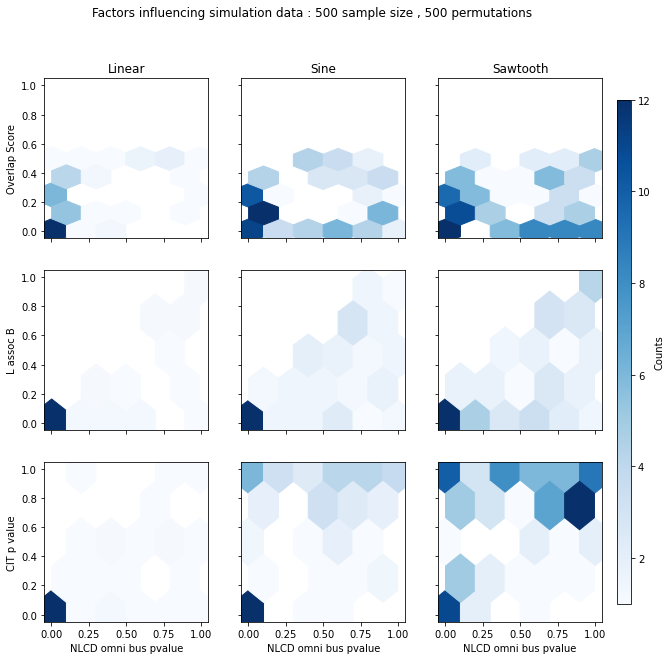

In [15]:
### Figure 3  ################

norows=3
nocols=3
fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
fig.suptitle("Factors influencing simulation data : 500 sample size , 500 permutations ")
#fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
#fig.text(0.22, 1, 'Linear', ha='center')
#fig.text(0.52, 1, 'Sine', ha='center')
#fig.text(0.85, 1, 'Saw', ha='center')
#fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
#fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
#fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
for plot_index in [0,3,6]:
    if plot_index==0:
        x = 'p_final'
        y = 'OS Test 4'
    elif plot_index==3:
        x='p_final'
        y='p_LassocB'
    elif plot_index==6:
        x='p_final'
        y='p_cit'
    for j in ['Linear', 'Sine', 'Saw']: 
                   

        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        curr_ax.set_ylabel('')
        curr_ax.set_xlabel('')
        if(plot_index >=6 and plot_index <9):
           dfnlcd=pd.read_csv('./results/journal/simulation/nlcd/'+j+'KRR500s500perm.csv')
           dfcit=pd.read_csv('./results/journal/simulation/cit/'+j+'500cit500perm.csv') 
           #curr_ax.scatter(dfnlcd[x],dfcit[y])
           hb=curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5,mincnt=1, cmap='Blues')
           curr_ax.set_xlabel('NLCD omni bus pvalue')
        else:
           dfnlcd=pd.read_csv('./results/journal/simulation/nlcd/'+j+'KRR500s500perm.csv')
            #curr_ax.scatter(dfnlcd[x],dfnlcd[y])
           hb=curr_ax.hexbin(dfnlcd[x], dfnlcd[y], gridsize=5, mincnt=1,cmap='Blues')
        

        if(plot_index // nocols == 0 and plot_index % nocols == 0):
            curr_ax.set_title('Linear')
        elif(plot_index // nocols == 0 and plot_index % nocols == 1):
            curr_ax.set_title('Sine')
        elif(plot_index // nocols == 0 and plot_index % nocols == 2):
            curr_ax.set_title('Sawtooth')   
        if(plot_index % nocols == 0 and plot_index//nocols == 0):
            curr_ax.set_ylabel('Overlap Score')
        if(plot_index % nocols == 0 and plot_index//nocols == 1 ):
            curr_ax.set_ylabel('L assoc B')
        if(plot_index % nocols == 0 and plot_index // nocols == 2):
            curr_ax.set_ylabel('CIT p value')
        

        plot_index += 1

cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.set_label('Counts')
#fig.tight_layout()
#fig.tight_layout()
#fig.tight_layout()

plt.savefig("./results/journal/plots/fig_3.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig_3.svg', bbox_inches='tight',format='svg', dpi=1200)

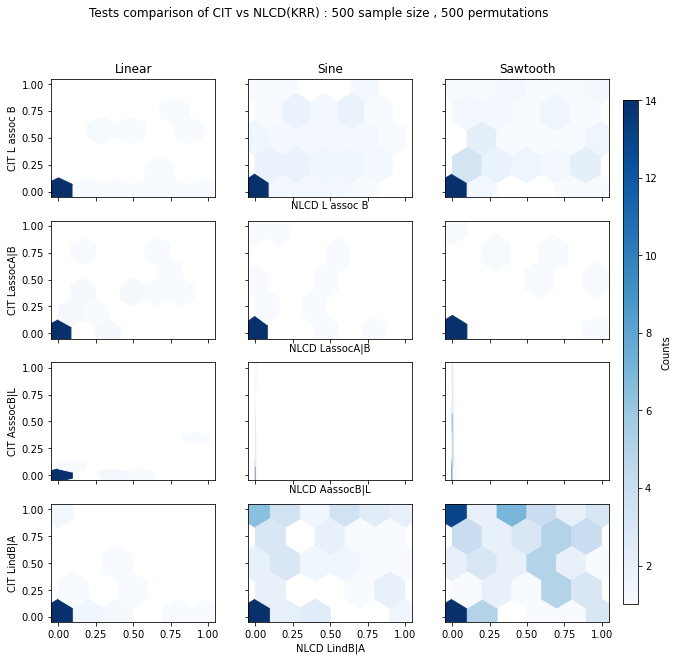

In [16]:
######### Figure 3 supplementary ######################
### Figure 3  ################

norows=4
nocols=3
fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
fig.suptitle("Tests comparison of CIT vs NLCD(KRR) : 500 sample size , 500 permutations ")
#fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
#fig.text(0.22, 1, 'Linear', ha='center')
#fig.text(0.52, 1, 'Sine', ha='center')
#fig.text(0.85, 1, 'Saw', ha='center')
#fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
#fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
#fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
for plot_index in [0,3,6,9]:
    if plot_index==0:
        x = 'p_LassocB'
        y = 'p_TL'
    elif plot_index==3:
        x='p_LassocA|B'
        y='p_GL'
    elif plot_index==6:
        x='p_AassocB|L'
        y='p_TG'
    elif plot_index==9:
        x='p_LindB|A'
        y='p_Lind'
    for j in ['Linear', 'Sine', 'Saw']: 
                   

        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        curr_ax.set_ylabel('')
        curr_ax.set_xlabel('')
        dfnlcd=pd.read_csv('./results/journal/simulation/nlcd/'+j+'KRR500s500perm.csv')
        dfcit=pd.read_csv('./results/journal/simulation/cit/'+j+'500cit500perm.csv') 
        hb=curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5,mincnt=1, cmap='Blues')
        if(plot_index//nocols == 0 and plot_index % nocols ==1 ):
            curr_ax.set_xlabel('NLCD L assoc B')
        if(plot_index//nocols == 1 and plot_index % nocols ==1 ):
            curr_ax.set_xlabel('NLCD LassocA|B')
        if(plot_index//nocols == 2 and plot_index % nocols ==1 ):
            curr_ax.set_xlabel('NLCD AassocB|L')
        if(plot_index//nocols == 3 and plot_index % nocols ==1 ):
            curr_ax.set_xlabel('NLCD LindB|A')

        if(plot_index // nocols == 0 and plot_index % nocols == 0):
            curr_ax.set_title('Linear')
        elif(plot_index // nocols == 0 and plot_index % nocols == 1):
            curr_ax.set_title('Sine')
        elif(plot_index // nocols == 0 and plot_index % nocols == 2):
            curr_ax.set_title('Sawtooth')   
        if(plot_index % nocols == 0 and plot_index//nocols == 0):
            curr_ax.set_ylabel('CIT L assoc B')
        if(plot_index % nocols == 0 and plot_index//nocols == 1 ):
            curr_ax.set_ylabel('CIT LassocA|B')
        if(plot_index % nocols == 0 and plot_index // nocols == 2):
            curr_ax.set_ylabel('CIT AsssocB|L')
        if(plot_index % nocols == 0 and plot_index // nocols == 3):
            curr_ax.set_ylabel('CIT LindB|A')
        
        

        plot_index += 1

cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.set_label('Counts')
#fig.tight_layout()
#fig.tight_layout()
#fig.tight_layout()

plt.savefig("./results/journal/plots/fig_3_suppl.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig_3_suppl.svg', bbox_inches='tight',format='svg', dpi=1200)

In [80]:
############ Muscle plot cytoscape ################
musclecausal=pd.read_csv("./results/journal/human_muscle/test_muscle.csv")
musclecausalrev=pd.read_csv("./results/journal/human_muscle/test_muscle_rev.csv")
finaldata=pd.concat([musclecausal['p_final'],musclecausalrev['p_final']], axis=1, keys=['A->B', 'B->A'])
result=[]
for index, row in finaldata.iterrows(): 
    if(row['A->B']<0.05 and row['B->A']>0.05):
        result.append('causal')
    elif(row['B->A']<0.05 and row['A->B']>0.05):
        result.append('causal in rev')
    elif(row['A->B']>0.05 and row['B->A']>0.05):
        result.append('independent')
    else:
        result.append('no call')
causal_indices = [i for i, x in enumerate(result) if x == "causal"]
causalrev_indices=[i for i, x in enumerate(result) if x == "causal in rev"]

In [96]:
############ Muscle plot cytoscape ################
fo=open('/data/users/cs20s037/CITNonLinear/yeastandhuman/human_muscle.txt', "r")
pairnames=[]
#fe=open("dataset_params.txt",'w')
while(1):
    line=fo.readline()
    if(line==""):
        break
    line=line.replace("\n","")
    line=line.replace("\"","")
    line=line.split(" ")
    pairnames.append(line[1]+" "+line[2])
    line=fo.readline()
    line=fo.readline()
    line=fo.readline()
fo.close()

In [100]:
############ Muscle plot cytoscape ################
causalnames=[pairnames[i] for i in causal_indices]
causalrevnames=[pairnames[i] for i in causalrev_indices]
causalnamessplit= [i.split() for i in causalnames]
df=pd.DataFrame(causalnamessplit)
df.columns=['source','target']
df.to_csv("./results/journal/human_muscle/causal.csv",index=False)
causalrevnamessplit= [i.split() for i in causalrevnames]
df=pd.DataFrame(causalrevnamessplit)
df.columns=['source','target']
df.to_csv("./results/journal/human_muscle/causal_rev.csv",index=False)

In [22]:
pairnames

NameError: name 'pairnames' is not defined

In [102]:
genepairs= [i.split() for i in pairnames]
dfgenepairs=pd.DataFrame(genepairs)

In [105]:
dfgenepairs

,0,1
0,ENSG00000079335,ENSG00000127903
1,ENSG00000225938,ENSG00000180190
2,ENSG00000142655,ENSG00000251003
3,ENSG00000085491,ENSG00000113732
4,ENSG00000085491,ENSG00000211949
...,...,...
3651,ENSG00000094841,ENSG00000198242
3652,ENSG00000102144,ENSG00000143995
3653,ENSG00000085224,ENSG00000123154
3654,ENSG00000237531,ENSG00000249859


In [108]:
dfgenepairs.loc[dfgenepairs[0]=='ENSG00000102554'] #KLF gene

,0,1
923,ENSG00000102554,ENSG00000162520
924,ENSG00000102554,ENSG00000101194
925,ENSG00000102554,ENSG00000198324
926,ENSG00000102554,ENSG00000173546
927,ENSG00000102554,ENSG00000108878
928,ENSG00000102554,ENSG00000173868
929,ENSG00000102554,ENSG00000119986


In [117]:
musclecausal.loc[[923,929,924,925,926,927,928,929],] # KLF gene in causal direction 

,p_final,p_LassocB,p_LassocA|B,p_AassocB|L,p_LindB|A,OS Test 4,child_seed,parent_seed
923,0.274900,0.013944,0.001992,0.089641,0.274900,0.1513,5995507754997703586,same
929,0.416335,0.041833,0.001992,0.416335,0.019920,0.1513,329671789811468438,same
924,0.199203,0.001992,0.001992,0.199203,0.003984,0.1513,1204802813285203939,same
925,0.478088,0.001992,0.001992,0.061753,0.478088,0.1513,4662583643308078341,same
926,0.167331,0.013944,0.001992,0.027888,0.167331,0.1513,4653839827877089956,same
927,0.752988,0.097610,0.001992,0.752988,0.163347,0.1513,662070361101920253,same
928,0.055777,0.001992,0.001992,0.055777,0.001992,0.1513,967568157993292285,same
929,0.416335,0.041833,0.001992,0.416335,0.019920,0.1513,329671789811468438,same


In [118]:
musclecausalrev.loc[[923,929,924,925,926,927,928,929],] # KLF gene in causal direction 

,p_final,p_LassocB,p_LassocA|B,p_AassocB|L,p_LindB|A,OS Test 4,child_seed,parent_seed
923,0.581673,0.001992,0.581673,0.103586,0.001992,0.195915,5288131027744133821,same
929,0.679283,0.001992,0.486056,0.679283,0.260956,0.189953,7363479117409471540,same
924,0.505976,0.001992,0.003984,0.505976,0.001992,0.181431,6434761208266959915,same
925,0.390438,0.001992,0.390438,0.007968,0.001992,0.171205,6880929972402221425,same
926,0.902390,0.001992,0.902390,0.099602,0.009960,0.188403,2787460887786360865,same
927,0.752988,0.001992,0.095618,0.752988,0.057769,0.204995,6713725755928937648,same
928,0.587649,0.001992,0.005976,0.587649,0.003984,0.164402,4899825171552240641,same
929,0.679283,0.001992,0.486056,0.679283,0.260956,0.189953,7363479117409471540,same


In [99]:
df

,source,target
0,ENSG00000188234,ENSG00000225784
1,ENSG00000099290,ENSG00000152726
2,ENSG00000227827,ENSG00000254681
3,ENSG00000254681,ENSG00000103226
4,ENSG00000247228,ENSG00000261079
5,ENSG00000090857,ENSG00000261079
6,ENSG00000178127,ENSG00000267809
7,ENSG00000233927,ENSG00000237039
8,ENSG00000242086,ENSG00000236833
9,ENSG00000237075,ENSG00000250138


In [119]:
############ get all 3 values ################
fo=open('/data/users/cs20s037/CITNonLinear/yeastandhuman/human_muscle.txt', "r")
pairnames=[]
#fe=open("dataset_params.txt",'w')
while(1):
    line=fo.readline()
    if(line==""):
        break
    line=line.replace("\n","")
    line=line.replace("\"","")
    line=line.split(" ")
    pairnames.append(line[0]+" "+line[1]+" "+line[2])
    line=fo.readline()
    line=fo.readline()
    line=fo.readline()
fo.close()

In [121]:
genepairs= [i.split() for i in pairnames]
dfgenepairs=pd.DataFrame(genepairs)

In [123]:
dfgenepairs.loc[dfgenepairs[1]=='ENSG00000181997'] 

,0,1,2
3508,9_70176768,ENSG00000181997,ENSG00000228522
3509,9_70176768,ENSG00000181997,ENSG00000186466


In [124]:
dfgenepairs.loc[dfgenepairs[1]=='ENSG00000186466'] 

,0,1,2
3496,9_67901658,ENSG00000186466,ENSG00000147996
3497,9_67901658,ENSG00000186466,ENSG00000181997


In [97]:
len(pairnames)

3656

In [84]:
len(causalrev_indices)

2

In [74]:
sum(musclecausal['p_final']<=0.05)

21

In [78]:

sum(musclecausalrev['p_final']<=0.05)

9

In [4]:
# muscle analysis for cit 
df=pd.read_csv('./results/journal/human_muscle/cit/causal.csv',header=0)

In [12]:
df.head()

,p_cit,p_TL,p_TG,p_GL,p_Lind,childseed,Parentseed
0,0.190047,0.002909,0.190047,3.707569e-08,0.105558,982438870,2075040132
1,0.410397,0.000390,0.410397,2.753044e-03,0.193338,1774889597,2075040132
2,0.623957,0.000003,0.623957,3.662927e-02,0.292087,486872445,2075040132
3,0.966271,0.239051,0.056728,5.495767e-15,0.966271,371407222,2075040132
4,0.645457,0.000244,0.608438,1.530478e-14,0.645457,1285475587,2075040132


In [8]:
df.iloc[[923,929,924,925,926,927,928,929],]

,p_cit,p_TL,p_TG,p_GL,p_Lind,childseed,Parentseed
923,5.377063e-04,5.377063e-04,3.510502e-24,7.403226e-11,1.393117e-27,448089274,2075040132
929,1.205820e-03,1.205820e-03,3.337954e-06,9.244254e-12,1.278674e-05,1563348219,2075040132
924,1.372753e-04,3.255362e-06,1.372753e-04,4.776703e-11,2.303625e-05,1932465664,2075040132
925,2.232606e-06,2.232606e-06,2.713511e-16,1.650188e-09,1.410922e-22,1340347039,2075040132
926,1.403745e-04,1.403745e-04,1.165498e-23,2.282105e-10,3.461275e-15,746517894,2075040132
927,1.071600e-02,1.071600e-02,6.427688e-04,1.877308e-12,2.296946e-04,2064601114,2075040132
928,5.252125e-07,5.252125e-07,6.008787e-13,1.734620e-09,9.550985e-09,57865244,2075040132
929,1.205820e-03,1.205820e-03,3.337954e-06,9.244254e-12,1.278674e-05,1563348219,2075040132


In [10]:
muscledata=read_data("./../../../yeastandhuman/human_muscle.txt")

In [23]:
muscleconfig=read_configuration("./../../../yeastandhuman/human_muscle.txt")

In [31]:
muscleconfig.iloc[925][2]

'ENSG00000198324'

In [16]:
i = 925

In [38]:
### going to plot all the KLF gene scatter plots ######## 
for i in [923,929,924,925,926,927,928,929]:
    plt.scatter(muscledata[i][1],muscledata[i][2],c=muscledata[i][0],alpha=0.6)
    plt.title("KLF gene pair number (zero indexed) "+str(i))
    plt.xlabel("KLF gene ENSG00000102554")
    plt.ylabel(str(muscleconfig.iloc[925][2]))
    plt.savefig('./results/journal/human_muscle/klfgene/index'+ str(i)+'.jpg',dpi=1200)
    plt.clf()


<Figure size 432x288 with 0 Axes>

In [42]:
simconfig= read_configuration('./data/Linear500.txt')

In [16]:
# going to plot all the linearly generated dataset for 500 samples 
#data=['Linear','Sine','Saw','Indp']
data=['Para']
for i in data:
    simdata=read_data('./data/'+i+'500.txt')
    simconfig= read_configuration('./data/'+i+'500.txt')
    for j in range(0,len(simdata)):
        plt.scatter(simdata[j][1],simdata[j][2],c=simdata[j][0],alpha=0.6)
        title=i+" data (zero indexed) index = "+str(j)+" config: "
        config=list(simconfig.iloc[j,])
        for k in config:
            title=title+k+","
        plt.title(title)
        plt.xlabel("A")
        plt.ylabel("B")
        plt.savefig('./results/journal/plots/simulation_plots/'+i+str(j)+'.jpg',dpi=300)
        plt.clf()


<Figure size 432x288 with 0 Axes>

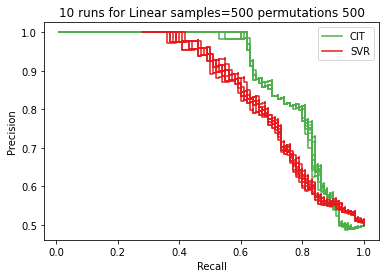

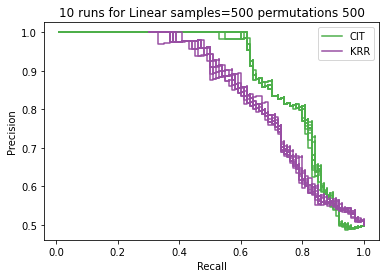

In [77]:
#automation
p='500'
filoc='./results/parallel/10runs/500samples'+p+'perm/'
datatypes=["Linear"]
algos=['SVR','KRR']
for datatype in datatypes:
    for algo in algos:
        fig, ax = plt.subplots()
        #CIT
        data = [filename for filename in os.listdir('./results/withoutparallel/10runs/500samples/cit') if filename.startswith(datatype)]
        indp = [filename for filename in os.listdir('./results/withoutparallel/10runs/500samples/cit') if filename.startswith("Indp")]

        for i in range(0,10):
            res=data[i]
            ind=indp[i]
            precision_nlmr_algo,recall_nlmr_algo= calculate_precision_recall('./results/withoutparallel/10runs/500samples/cit/'+res,'./results/withoutparallel/10runs/500samples/cit/'+ind,True)
            disp=PrecisionRecallDisplay(precision=precision_nlmr_algo, recall=recall_nlmr_algo)
            if(i!=0):
                disp.plot(ax=ax, color=color_algo['CIT'],label='')
            else:
                disp.plot(ax=ax, color=color_algo['CIT'],label='CIT')
        #NLMR
        #data = [filename for filename in os.listdir('./10runs/500samples/nlmr/') if filename.startswith(datatype+algo)]
        #indp = [filename for filename in os.listdir('./10runs/500samples/nlmr/') if filename.startswith("Indp"+algo)]
        data = [filename for filename in os.listdir(filoc) if filename.startswith(datatype+algo)]
        indp = [filename for filename in os.listdir(filoc) if filename.startswith("Indp"+algo)]
        for i in range(0,10):
            res=data[i]
            ind=indp[i]
            #precision_nlmr_algo,recall_nlmr_algo= calculate_precision_recall('./10runs/500samples/nlmr/'+res,'./10runs/500samples/nlmr/'+ind)
            precision_nlmr_algo,recall_nlmr_algo= calculate_precision_recall(filoc+res,filoc+ind)

            disp=PrecisionRecallDisplay(precision=precision_nlmr_algo, recall=recall_nlmr_algo)
            if(i!=0):
                disp.plot(ax=ax, color=color_algo[algo],label='')
            else:
                disp.plot(ax=ax, color=color_algo[algo],label=algo)

        ax.legend( loc="best")
        ax.set_title("10 runs for "+datatype+" samples=500 permutations "+p)
        plt.savefig("../../../plots/parallel/prcurve10runs"+datatype+algo+p+'perm.png')


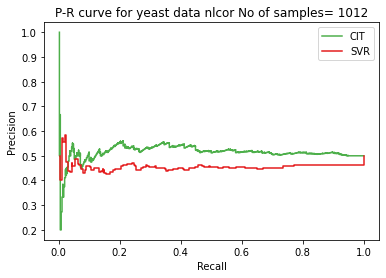

In [7]:
### yeast 
precision_nlmr_SVR,recall_nlmr_SVR= calculate_precision_recall("./results/nlcor_yeast/causal350p100.txt","./results/nlcor_yeast/indep350p100.txt")
#precision_nlmr_ANN,recall_nlmr_ANN= calculate_precision_recall("./results/parallel/initialtable/"+i+"ANN"+j+"s100perm.txt","./results/parallel/initialtable/IndpANN"+j+"s100perm.txt")
#precision_nlmr_KRR,recall_nlmr_KRR= calculate_precision_recall("./results/parallel/initialtable/"+i+"KRR"+j+"s100perm.txt","./results/parallel/initialtable/IndpKRR"+j+"s100perm.txt")
precision_CIT,recall_CIT= calculate_precision_recall("./results/nlcor_yeast/yeastcausal350cit.csv","./results/nlcor_yeast/yeastindp350cit.csv",iscit=True)
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
disp=PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
disp.plot(ax=ax, name="SVR", color=color_algo['SVR'])
#ax.set_xlim([0.0, 1.0])
#ax.set_ylim([0.0, 1.05])
ax.legend( loc="best")
ax.set_title("P-R curve for yeast data nlcor No of samples= 1012")
plt.savefig("./results/update/plots/prcurveyeast350.png")

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [32]:
cmap=sns.choose_colorbrewer_palette("q")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [101]:
cmap

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098)]

In [ ]:
#SVR- cmap[0]
#ANN - cmap[1]
#CIT - cmap[2]
#KRR - cmap[3]

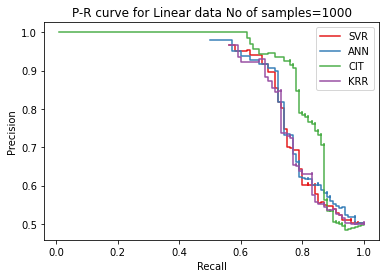

In [64]:
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
disp.plot(ax=ax, name="SVR", color=color_algo['SVR'])
disp=PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
disp.plot(ax=ax,name="ANN",color=color_algo['ANN'])
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
disp.plot(ax=ax,name="KRR",color=color_algo['KRR'])
#ax.set_xlim([0.0, 1.0])
#ax.set_ylim([0.0, 1.05])
ax.legend( loc="best")
ax.set_title("P-R curve for Linear data No of samples=1000")
plt.savefig('./../../../plots/parallel/sample.png')

In [33]:
data = [filename for filename in os.listdir('./results/parallel/10runs/500samples100perm') if filename.startswith("Linear")]
indp = [filename for filename in os.listdir('./results/parallel/10runs/500samples100perm') if filename.startswith("Indp")]


In [58]:
color_algo['KRR']

(0.5960784313725492, 0.3058823529411765, 0.6392156862745098)

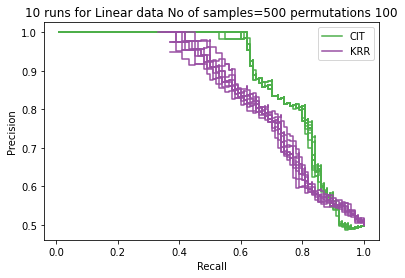

In [62]:
datatype="Linear"
fig, ax = plt.subplots()
#CIT
data = [filename for filename in os.listdir('./results/withoutparallel/10runs/500samples/cit') if filename.startswith(datatype)]
indp = [filename for filename in os.listdir('./results/withoutparallel/10runs/500samples/cit') if filename.startswith("Indp")]

for i in range(0,10):
    res=data[i]
    ind=indp[i]
    precision_nlmr_algo,recall_nlmr_algo= calculate_precision_recall('./results/withoutparallel/10runs/500samples/cit/'+res,'./results/withoutparallel/10runs/500samples/cit/'+ind,True)
    disp=PrecisionRecallDisplay(precision=precision_nlmr_algo, recall=recall_nlmr_algo)
    if(i!=0):
        disp.plot(ax=ax, color=color_algo['CIT'],label='')
    else:
        disp.plot(ax=ax, color=color_algo['CIT'],label='CIT')
#NLMR
algo="KRR"
#data = [filename for filename in os.listdir('./10runs/500samples/nlmr/') if filename.startswith(datatype+algo)]
#indp = [filename for filename in os.listdir('./10runs/500samples/nlmr/') if filename.startswith("Indp"+algo)]
data = [filename for filename in os.listdir('./results/parallel/10runs/500samples100perm/') if filename.startswith(datatype+algo)]
indp = [filename for filename in os.listdir('./results/parallel/10runs/500samples100perm/') if filename.startswith("Indp"+algo)]
for i in range(0,10):
    res=data[i]
    ind=indp[i]
    #precision_nlmr_algo,recall_nlmr_algo= calculate_precision_recall('./10runs/500samples/nlmr/'+res,'./10runs/500samples/nlmr/'+ind)
    precision_nlmr_algo,recall_nlmr_algo= calculate_precision_recall('./results/parallel/10runs/500samples100perm/'+res,'./results/parallel/10runs/500samples100perm/'+ind)

    disp=PrecisionRecallDisplay(precision=precision_nlmr_algo, recall=recall_nlmr_algo)
    if(i!=0):
        disp.plot(ax=ax, color=color_algo[algo],label='')
    else:
        disp.plot(ax=ax, color=color_algo[algo],label=algo)

ax.legend( loc="best")
ax.set_title("10 runs for "+datatype+" data No of samples=500 permutations 100")
plt.show()


In [45]:
cmap

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804)]

In [6]:
def make_table(res,ind,iscit=False):
    precision=[]
    recall=[]
    TN=[]
    FN=[]
    FP=[]
    TP=[]
    if iscit==True:
        citpresults= pd.read_csv(res)
        citpresults.loc[:,'p_res'] = 1
        citpresultsInd= pd.read_csv(ind)
        citpresultsInd.loc[:,'p_res'] = 0
        pCitMix=pd.concat([citpresults,citpresultsInd],ignore_index=True)
        pCitMix.columns= ['pred','p_TL', 'p_TG', 'p_GL','p_Lind','GroundTruth']
        uniq_val=np.unique(pCitMix['pred'])
        
        for i in uniq_val:
            pCitMix['results']=pCitMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pCitMix['GroundTruth'], pCitMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pCitMix['GroundTruth'],pCitMix['results']))
            recall.append(recall_score(pCitMix['GroundTruth'],pCitMix['results']))
        
    else:
        presults= pd.read_csv(res,header=None)
        presults.loc[:,0]=1
        presultsInd=pd.read_csv(ind,header=None)
        presultsInd.loc[:,0]=0
        pMix=pd.concat([presults,presultsInd],ignore_index=True)
        pMix.columns= ['GroundTruth','p_L->A', 'p_L->B', 'conditional']
        pMix['pred']=pMix.apply (lambda row: max(row[1],row[2],row[3]) , axis=1)
        #pMix['pred']=pMix.apply (lambda row: (1/101) if row['pred']==1 else ((100/101) if row['pred']==0 else row['pred']), axis=1)
        pMix['pred']=pMix.apply (lambda row: (row['pred']*100+1)/102 , axis=1)
        uniq_val=np.unique(pMix['pred'])
        for i in uniq_val:
            pMix['results']=pMix.apply (lambda row: 1 if row['pred'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pMix['GroundTruth'], pMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))
    
    table=pd.DataFrame(np.column_stack([uniq_val,TP,FP,TN,FN,precision,recall]),columns=['p cutoffs','TP','FP','TN','FN','precision','recall'])
            
    return table

In [7]:
table1=make_table(res_SVR,ind_SVR)

In [8]:
table1

,p cutoffs,TP,FP,TN,FN,precision,recall
0,0.009901,2.0,1.0,143.0,119.0,0.666667,0.016529
1,0.010000,5.0,2.0,142.0,116.0,0.714286,0.041322
2,0.020000,5.0,3.0,141.0,116.0,0.625000,0.041322
3,0.030000,6.0,4.0,140.0,115.0,0.600000,0.049587
4,0.040000,7.0,4.0,140.0,114.0,0.636364,0.057851
...,...,...,...,...,...,...,...
83,0.940000,51.0,140.0,4.0,70.0,0.267016,0.421488
84,0.960000,51.0,141.0,3.0,70.0,0.265625,0.421488
85,0.970000,51.0,143.0,1.0,70.0,0.262887,0.421488
86,0.980000,52.0,143.0,1.0,69.0,0.266667,0.429752


In [9]:
table1['TP']

0       2.0
1       5.0
2       5.0
3       6.0
4       7.0
      ...  
83     51.0
84     51.0
85     51.0
86     52.0
87    121.0
Name: TP, Length: 88, dtype: float64

In [10]:
table1.to_csv("p_cutoff_Linear.csv")

/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


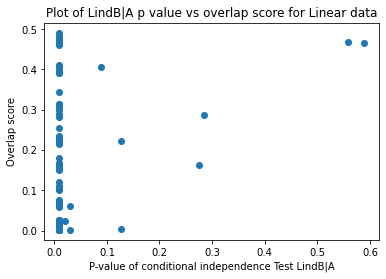

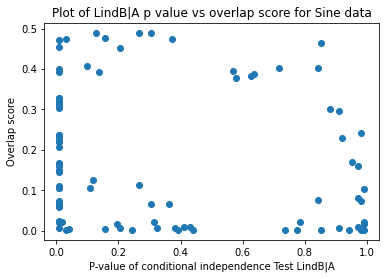

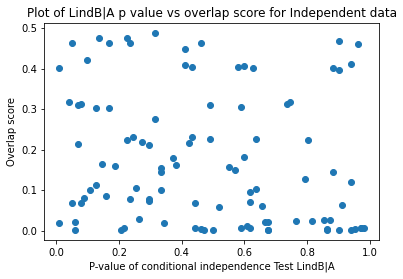

In [112]:
datatype=['Linear','Sine','Indp']
for i in datatype:
    data=pd.read_csv("./results/parallel/newalgosingle/"+i+"KRR1000s100perm.txt",header=0,skipfooter=1)
    #data.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
    #data['p_LindB|A']= (data['p_LindB|A']*100 + 1)/(102)
    plt.figure()
    plt.scatter(data['p_LindB|A'],data['OS Test 4'])
    if(i=='Indp'):
        plt.title("Plot of LindB|A p value vs overlap score for Independent data")
    else:
        plt.title("Plot of LindB|A p value vs overlap score for "+i+" data")
    plt.xlabel('P-value of conditional independence Test LindB|A')
    plt.ylabel('Overlap score')
    plt.savefig("./results/parallel/plots/overlapfig"+i+"KRR1000s100perm.png")

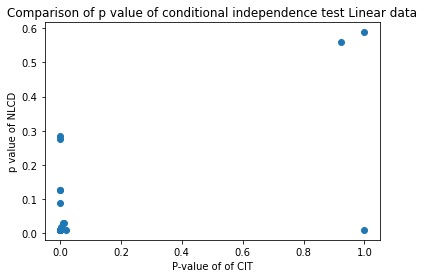

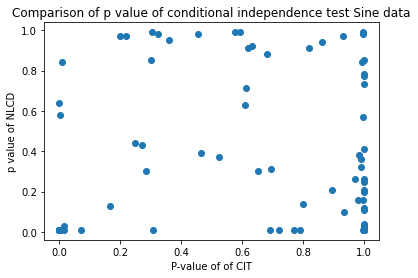

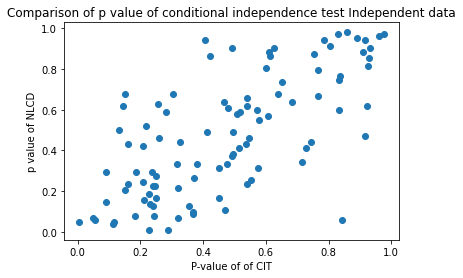

In [119]:
datatype=['Linear','Sine','Indp']
for i in datatype:
    data=pd.read_csv("./results/parallel/newalgosingle/"+i+"KRR1000s100perm.txt",header=0,skipfooter=1)
    data_cit=pd.read_csv("./results/parallel/newalgocit/"+i+"1000cit.csv",header=0)
    #data_cit['p_Lind']
    #data.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
    #data['p_LindB|A']= (data['p_LindB|A']*100 + 1)/(102)
    plt.figure()
    plt.scatter(data_cit['p_Lind'],data['p_LindB|A'])
    if(i=='Indp'):
        plt.title("Comparison of p value of conditional independence test Independent data")
    else:
        plt.title("Comparison of p value of conditional independence test "+i+" data")
    plt.xlabel('P-value of of CIT')
    plt.ylabel('p value of NLCD')
    plt.savefig("./results/parallel/plots/pvalcomparison"+i+"KRR1000s100permCIT.png")

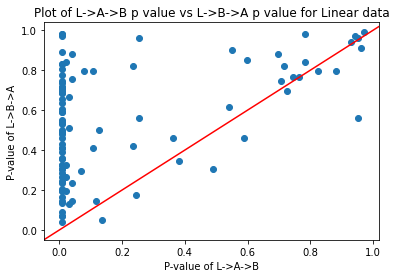

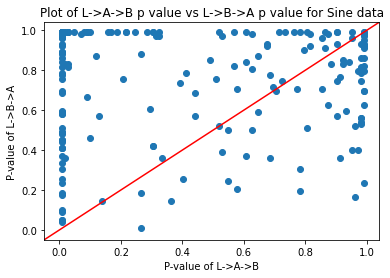

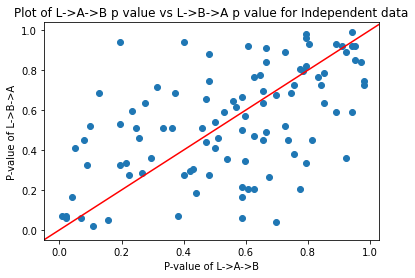

In [75]:
## plot between the p value of L->A->B vs L->B->A for the synthetic data 
datatype=['Linear','Sine','Indp']
for i in datatype:
    data=pd.read_csv("./results/update/2way/"+i+"1000SVRp100.txt",skiprows=1,header=None)
    data.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap','p_L->A_rev', 'p_L->B_rev', 'p_LindB|A_rev','p_L->A|B_rev','overlap_rev']
    data['pred']=data.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
    data['pred_rev']=data.apply (lambda row: max(row[5],row[6],row[7],row[8]) , axis=1)
    data['pred']= (data['pred']*100 + 1)/(102)
    data['pred_rev']= (data['pred_rev']*100 + 1)/(102)
    plt.figure()
    plt.scatter(data['pred'],data['pred_rev'])
    plt.axline((0, 0), slope=1,color='red')
    if(i=='Indp'):
        plt.title("Plot of L->A->B p value vs L->B->A p value for Independent data")
    else:
        plt.title("Plot of L->A->B p value vs L->B->A p value for "+i+" data")
    plt.xlabel('P-value of L->A->B')
    plt.ylabel('P-value of L->B->A')
    plt.savefig("./results/update/plots/twowayfig"+i+"1000s100perm.png")
  

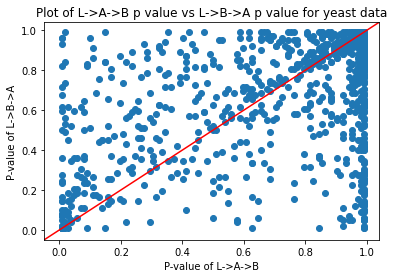

In [79]:
## plot between the p value of L->A->B vs L->B->A for the yeast 
yeastcausal=pd.read_csv("./results/update/2way/causal1kp100.txt",skiprows=1,header=None)
yeastcausalrev=pd.read_csv("./results/update/2way/causal1kp100rev.txt",skiprows=1,header=None)
yeastcausal.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
yeastcausalrev.columns=['p_L->A_rev', 'p_L->B_rev', 'p_LindB|A_rev','p_L->A|B_rev','overlap_rev']
yeastcausal['pred']=yeastcausal.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausalrev['pred_rev']=yeastcausalrev.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausal['pred']= (yeastcausal['pred']*100 + 1)/(102)
yeastcausalrev['pred_rev']= (yeastcausalrev['pred_rev']*100 + 1)/(102)
plt.figure()
plt.scatter(yeastcausal['pred'],yeastcausalrev['pred_rev'])
plt.axline((0, 0), slope=1,color='red')
plt.title("Plot of L->A->B p value vs L->B->A p value for yeast data")
plt.xlabel('P-value of L->A->B')
plt.ylabel('P-value of L->B->A')
plt.savefig("./results/update/plots/twowayyeast1000s100perm.png")
  

In [153]:
#code to find the number of causal trios ############# ###using the same code for independent data
## plot between the p value of L->A->B vs L->B->A for the yeast 
yeastcausal=pd.read_csv("./results/update/2way/indep1kp100.txt",skiprows=1,header=None)
yeastcausalrev=pd.read_csv("./results/update/2way/indep1kp100rev.txt",skiprows=1,header=None)
yeastcausal.columns= ['p_L->A', 'p_L->B', 'p_LindB|A','p_L->A|B','overlap']
yeastcausalrev.columns=['p_L->A_rev', 'p_L->B_rev', 'p_LindB|A_rev','p_L->A|B_rev','overlap_rev']
yeastcausal['pred']=yeastcausal.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausalrev['pred_rev']=yeastcausalrev.apply (lambda row: max(row[0],row[1],row[2],row[3]) , axis=1)
yeastcausal['pred']= (yeastcausal['pred']*100 + 1)/(102)
yeastcausalrev['pred_rev']= (yeastcausalrev['pred_rev']*100 + 1)/(102)

  

In [154]:
sum(yeastcausal['pred']<=0.05)

48

In [155]:
sum(yeastcausalrev['pred_rev']<=0.05)

27

In [156]:
finaldata=pd.concat([yeastcausal['pred'],yeastcausalrev['pred_rev']], axis=1, keys=['A->B', 'B->A'])

In [157]:
result=[]
for index, row in finaldata.iterrows(): 
    if(row['A->B']<0.05 and row['B->A']>0.05):
        result.append('causal')
    elif(row['B->A']<0.05 and row['A->B']>0.05):
        result.append('causal in rev')
    elif(row['A->B']>0.05 and row['B->A']>0.05):
        result.append('independent')
    else:
        result.append('no call')
    

In [158]:
causal_indices = [i for i, x in enumerate(result) if x == "causal"]
causalrev_indices=[i for i, x in enumerate(result) if x == "causal in rev"]

In [160]:
len(causal_indices)

33

In [159]:
len(causalrev_indices)

12

In [161]:
fo=open('/data/users/cs20s037/CITNonLinear/oldfiles/yeast_residual_data_full_1000_gt_2.txt', "r")
pairnames=[]
#fe=open("dataset_params.txt",'w')
while(1):
    line=fo.readline()
    if(line==""):
        break
    line=line.replace("\n","")
    line=line.replace("\"","")
    line=line.split(" ")
    pairnames.append(line[2]+" "+line[3])
    line=fo.readline()
    line=fo.readline()
    line=fo.readline()
fo.close()


In [162]:
pairnames

['YDR310C YDL047W',
 'YMR182C YOR261C',
 'YKR034W YOR353C',
 'YBR239C YLR180W',
 'YHL027W YGR138C',
 'YDR421W YBR104W',
 'YGR044C YOL111C',
 'YDR423C YLR185W',
 'YMR164C YOR237W',
 'YHL020C YDR334W',
 'YDR423C YBL099W',
 'YMR016C YPL248C',
 'YMR164C YBR001C',
 'YKL185W YDL095W',
 'YKL038W YOR190W',
 'YMR164C YLL006W',
 'YHR178W YJR074W',
 'YGR044C YFR031C',
 'YFL021W YOR388C',
 'YNL314W YKL051W',
 'YNL199C YHR081W',
 'YDR216W YDL101C',
 'YGR044C YLR051C',
 'YOR363C YER033C',
 'YFR034C YFR051C',
 'YDL170W YBR081C',
 'YFR034C YPL183C',
 'YMR021C YCR005C',
 'YGL237C YHL004W',
 'YHR206W YGR162W',
 'YMR182C YML072C',
 'YHR178W YMR188C',
 'YKL038W YLR384C',
 'YKL109W YGR232W',
 'YOL067C YHL033C',
 'YNL068C YER117W',
 'YDR423C YPR152C',
 'YCR065W YIL101C',
 'YOR140W YDR502C',
 'YDR423C YIL075C',
 'YPL248C YGL201C',
 'YFL021W YGR144W',
 'YIR017C YOR286W',
 'YDL170W YMR199W',
 'YIR033W YKL185W',
 'YER045C YJL148W',
 'YKL185W YBR137W',
 'YOR363C YHL020C',
 'YDR259C YMR214W',
 'YPL133C YML048W',


In [163]:
causalnames=[pairnames[i] for i in causal_indices]
causalrevnames=[pairnames[i] for i in causalrev_indices]

In [144]:
causalnamessplit= [i.split() for i in causalnames]
df=pd.DataFrame(causalnamessplit)
df.columns=['source','target']
df.to_csv("causalfromindepyeast.csv",index=False)

In [152]:
causalrevnamessplit= [i.split() for i in causalrevnames]
df=pd.DataFrame(causalrevnamessplit)
df.columns=['source','target']
df.to_csv("causalfromindepyeastrev.csv",index=False)

In [101]:
#result.count('independent')

921

In [63]:
data

,p_L->A,p_L->B,p_LindB|A,p_L->A|B,overlap,p_L->A_rev,p_L->B_rev,p_LindB|A_rev,p_L->A|B_rev,overlap_rev
0,0.73,0.60,0.11,0.53,0.469683,0.66,0.70,0.21,0.63,0.469070
1,0.09,0.77,0.13,0.21,0.472220,0.77,0.10,0.45,0.60,0.486001
2,0.23,0.43,0.54,0.14,0.482431,0.41,0.11,0.62,0.21,0.479811
3,0.03,0.96,0.76,0.01,0.464626,0.97,0.04,0.32,0.83,0.483974
4,0.04,0.08,0.49,0.05,0.473504,0.13,0.08,0.02,0.30,0.479307
...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.297283,0.00,0.00,0.00,0.75,0.398212
96,0.00,0.00,0.00,0.00,0.322121,0.00,0.00,0.00,0.69,0.404346
97,0.00,0.00,0.00,0.00,0.312582,0.00,0.00,0.00,0.72,0.394068
98,0.00,0.00,0.00,0.00,0.291871,0.00,0.00,0.00,0.78,0.351253


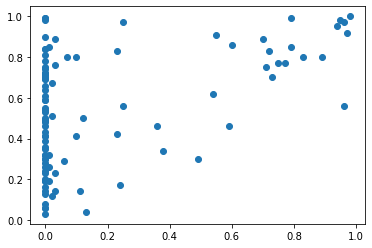

In [68]:
plt.scatter(data['pred'],data['pred_rev'])


In [70]:
data

,p_L->A,p_L->B,p_LindB|A,p_L->A|B,overlap,p_L->A_rev,p_L->B_rev,p_LindB|A_rev,p_L->A|B_rev,overlap_rev,pred,pred_rev
0,0.73,0.60,0.11,0.53,0.469683,0.66,0.70,0.21,0.63,0.469070,0.725490,0.70
1,0.09,0.77,0.13,0.21,0.472220,0.77,0.10,0.45,0.60,0.486001,0.764706,0.77
2,0.23,0.43,0.54,0.14,0.482431,0.41,0.11,0.62,0.21,0.479811,0.539216,0.62
3,0.03,0.96,0.76,0.01,0.464626,0.97,0.04,0.32,0.83,0.483974,0.950980,0.97
4,0.04,0.08,0.49,0.05,0.473504,0.13,0.08,0.02,0.30,0.479307,0.490196,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.297283,0.00,0.00,0.00,0.75,0.398212,0.009804,0.75
96,0.00,0.00,0.00,0.00,0.322121,0.00,0.00,0.00,0.69,0.404346,0.009804,0.69
97,0.00,0.00,0.00,0.00,0.312582,0.00,0.00,0.00,0.72,0.394068,0.009804,0.72
98,0.00,0.00,0.00,0.00,0.291871,0.00,0.00,0.00,0.78,0.351253,0.009804,0.78


In [15]:
#checking the difference between second test for regression and the FI test for test 2 
df=pd.read_csv("./results/parallel/human/secondtime/SineSVR500s100perm.txt",header=None,skiprows=1)
df.columns=['p_final','LB','LA|B','AB|L','LindB|A','regress','OStest2','OStest4']

Text(0, 0.5, 'Using regressing out ')

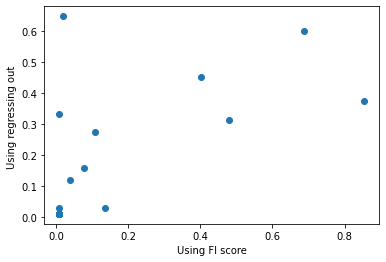

In [16]:
plt.scatter(df['LA|B'],df['regress'])
plt.xlabel('Using FI score')
plt.ylabel('Using regressing out ')

In [21]:
df['final_FI']=df.apply (lambda row: max(row[1],row[2],row[3],row[4]) , axis=1)

In [22]:
df['final_regress']=df.apply (lambda row: max(row[1],row[2],row[3],row[5]) , axis=1)

In [23]:
sum(df['final_FI']<0.05)

36

In [24]:
sum(df['final_regress']<0.05)

49

In [19]:
sum(df['p_final']<0.05)

36

In [18]:
sum(df['LA|B']<0.05)

93

In [3]:
new=pd.read_csv('./results/comparewitholdLinear1000KRRp1000.csv',header=0)

In [4]:
new

,LB_p,LA|Bv1,LA|Bv2,LA|Bv3,AB|L,LindB|A,OSt2v2,OSt2v3,OSt4,seed,parent_seed
0,0.656863,0.686275,0.852941,0.921569,0.068627,0.196078,0.469683,0.469070,0.469683,2113940365817139527,328843483580361856623349466212758650087
1,0.813725,0.205882,0.872549,0.627451,0.039216,0.127451,0.472220,0.486001,0.472220,5033757513616199037,same
2,0.343137,0.147059,0.323529,0.254902,0.009804,0.598039,0.482431,0.479811,0.482431,3245742229461289655,same
3,0.990196,0.039216,0.401961,0.235294,0.009804,0.735294,0.464626,0.483974,0.464626,4912062430845654245,same
4,0.058824,0.088235,0.637255,0.196078,0.009804,0.460784,0.473504,0.479307,0.473504,8162889587901115528,same
...,...,...,...,...,...,...,...,...,...,...,...
95,0.009804,0.009804,0.617647,0.009804,0.009804,0.009804,0.297283,0.398212,0.297283,5254923284346769657,same
96,0.009804,0.009804,0.529412,0.009804,0.009804,0.009804,0.322121,0.404346,0.322121,5506403943864711293,same
97,0.009804,0.009804,0.617647,0.009804,0.009804,0.009804,0.312582,0.394068,0.312582,4698085219510188447,same
98,0.009804,0.009804,0.823529,0.009804,0.009804,0.009804,0.291871,0.351253,0.291871,167099283432432320,same


In [6]:
old=pd.read_csv('./results/parallel/initialtable/LinearKRR1000s100perm.txt',header=None,skiprows=1)

In [7]:
old

,0,1,2,3,4
0,0.75,0.59,0.24,0.69,0.469683
1,0.16,0.84,0.09,0.22,0.472220
2,0.27,0.42,0.48,0.10,0.482431
3,0.05,0.98,0.72,0.05,0.464626
4,0.09,0.05,0.50,0.06,0.473504
...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.297283
96,0.00,0.00,0.00,0.00,0.322121
97,0.00,0.00,0.00,0.00,0.312582
98,0.00,0.00,0.00,0.00,0.291871


Text(0.5, 1.0, 'Old L->B vs new L->B test ')

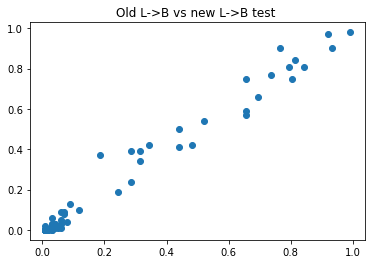

In [11]:
plt.scatter(new['LB_p'],old[1])
plt.title('Old L->B vs new L->B test ')

Text(0.5, 1.0, 'Old test 2 reg vs new test 2 reg ')

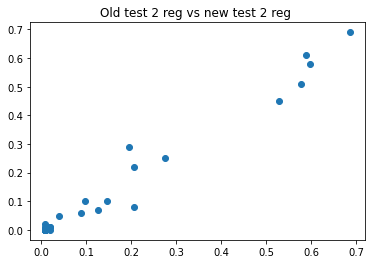

In [13]:
plt.scatter(new['LA|Bv1'],old[3])
plt.title('Old test 2 reg vs new test 2 reg ')

Text(0, 0.5, 'FI test old code')

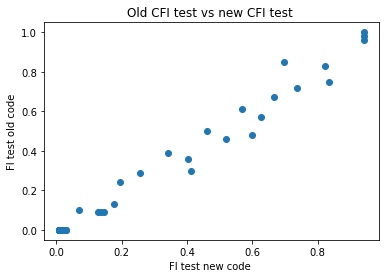

In [16]:
plt.scatter(new['LindB|A'],old[2])
plt.title('Old CFI test vs new CFI test ')
plt.xlabel('FI test new code ')
plt.ylabel('FI test old code')

(array([ 4.,  3.,  8.,  7., 11.,  7., 16.,  9., 18., 17.]),
 array([0.019608 , 0.1166668, 0.2137256, 0.3107844, 0.4078432, 0.504902 ,
        0.6019608, 0.6990196, 0.7960784, 0.8931372, 0.990196 ]),
 <BarContainer object of 10 artists>)

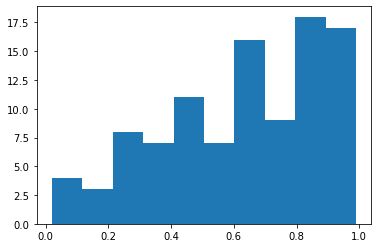

In [17]:
plt.hist(new['LA|Bv2'])

In [31]:
#testing to read the configurations or the trios 
############ Muscle plot cytoscape ################
data=''
def configuration(data):
    fo=open(data, "r")
    confignames=[]
    if(data.find('yeast')==-1 and data.find('human')==-1): #if yeast is not present
        line=fo.readline() # read the line, the control will start from the next line 
    while(1):
        line=fo.readline()
        if(line==""):
            break
        line=line.replace("\n","")
        line=line.replace("\"","")
        line=line.split(" ")  
        configs=[]  
        for i in line: 
            configs.append(i)
        confignames.append(configs)
        line=fo.readline()
        line=fo.readline()
        line=fo.readline()
    fo.close()
    return pd.DataFrame(confignames)


In [33]:
configuration('/data/users/cs20s037/CITNonLinear/yeastandhuman/human_muscle.txt')

,0,1,2
0,1_100880328,ENSG00000079335,ENSG00000127903
1,1_101368442,ENSG00000225938,ENSG00000180190
2,1_10571142,ENSG00000142655,ENSG00000251003
3,1_108737586,ENSG00000085491,ENSG00000113732
4,1_108737586,ENSG00000085491,ENSG00000211949
...,...,...,...
3651,X_74100893,ENSG00000094841,ENSG00000198242
3652,X_76898828,ENSG00000102144,ENSG00000143995
3653,X_77482085,ENSG00000085224,ENSG00000123154
3654,X_954665,ENSG00000237531,ENSG00000249859


In [29]:
pd.DataFrame(confignames)

,0,1
0,0.1,0.1
1,0.1,0.5
2,0.1,1
3,0.1,1.5
4,0.1,2
...,...,...
95,6,2.5
96,6,3
97,6,4
98,6,5


In [13]:
fo=open('/data/users/cs20s037/CITNonLinear/conclude/newmethod/Linear1000update.txt', "r")

In [15]:
line=fo.readline()

In [16]:
line=line.replace("\n","")

In [18]:
line=line.replace("\"","")

In [20]:
line=line.split(" ") 

In [21]:
line

['0.1', '0.1']

In [9]:
pd.DataFrame({'L':geno,'A':A,'B':B})

,L,A,B
0,1_100880328,ENSG00000079335,ENSG00000127903
1,1_101368442,ENSG00000225938,ENSG00000180190
2,1_10571142,ENSG00000142655,ENSG00000251003
3,1_108737586,ENSG00000085491,ENSG00000113732
4,1_108737586,ENSG00000085491,ENSG00000211949
...,...,...,...
3651,X_74100893,ENSG00000094841,ENSG00000198242
3652,X_76898828,ENSG00000102144,ENSG00000143995
3653,X_77482085,ENSG00000085224,ENSG00000123154
3654,X_954665,ENSG00000237531,ENSG00000249859


In [ ]:
pd.DataFrame()

In [19]:
L=np.random.binomial(1,0.5,1000)

In [5]:
L

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [20]:
A=2*L + np.random.normal(0,1,1000)

In [29]:
A

array([ 1.33526951,  2.54913728,  0.07427971, -0.51242683,  1.58652956,
        1.14976751, -0.83100154,  0.47527818, -1.12987625,  0.18545719,
        2.22190356,  0.54125244, -0.76734826,  3.22170423,  1.70700682,
        3.39516183, -1.4267309 ,  1.30807727,  3.04068336, -0.54608857,
        2.73701732,  1.00919976,  3.73375589,  2.20024626,  3.53556966,
        1.79588434,  0.72102693,  2.2388647 ,  1.2954167 ,  1.15480041,
        2.79318163,  1.66237785,  2.7236802 ,  3.21596795,  3.46816026,
       -0.95227549,  1.76808652,  1.95029623,  2.76060422, -1.09873068,
        0.28295158,  2.57871972,  0.66508815,  2.63017876,  1.69660404,
        1.76234404,  0.09711859,  0.55755729,  1.25239032,  1.52107561,
        1.47061447,  1.0798434 ,  2.97800438, -0.49607128, -0.0381249 ,
        3.51487496,  0.4026948 ,  2.26746112, -0.11030085, -0.25792672,
        1.22210341,  2.35742367, -2.91851143,  0.39364169, -0.65918044,
        3.39383624,  2.69212633,  0.1697308 ,  1.83768416,  1.45

In [27]:
B=100*(A**2) + np.random.normal(0,50,1000)

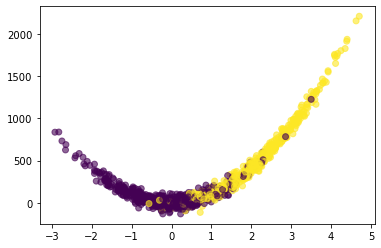

In [28]:
plt.scatter(A,B,c=L,alpha=0.6)

Text(0.5, 1.0, '500 samples para unequal variance ')

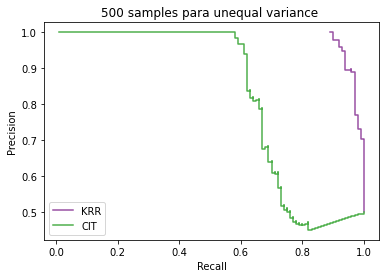

In [11]:
precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/ParavarKRR500s100perm.csv", "./results/journal/simulation/nlcd/IndpKRR500s100perm.csv")
precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/Paravar500cit100perm.csv", "./results/journal/simulation/cit/Indp500cit100perm.csv")
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
disp.plot(ax=ax, name="KRR", color=color_algo['KRR'])
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
plt.title("500 samples para unequal variance ")

Text(0.5, 1.0, '1000 samples para unequal variance ')

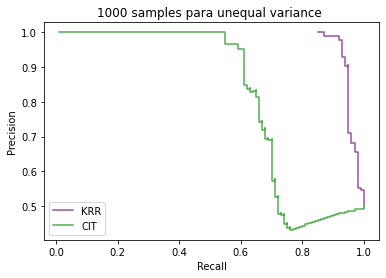

In [15]:
precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/ParavarKRR1000s100perm.csv", "./results/journal/simulation/nlcd/IndpKRR1000s100perm.csv")
precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/Paravar1000cit100perm.csv", "./results/journal/simulation/cit/Indp1000cit100perm.csv")
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
disp.plot(ax=ax, name="KRR", color=color_algo['KRR'])
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
plt.title("1000 samples para unequal variance ")

Text(0.5, 1.0, '300 samples para unequal variance ')

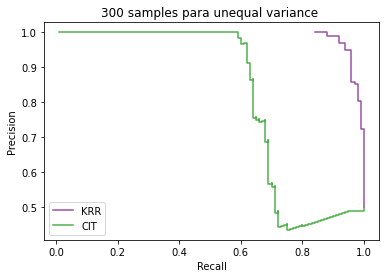

In [14]:
precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/ParavarKRR300s100perm.csv", "./results/journal/simulation/nlcd/IndpKRR300s100perm.csv")
precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/Paravar300cit100perm.csv", "./results/journal/simulation/cit/Indp300cit100perm.csv")
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
disp.plot(ax=ax, name="KRR", color=color_algo['KRR'])
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
plt.title("300 samples para unequal variance ")

In [16]:
pd.DataFrame(precision_nlmr_KRR,recall_nlmr_KRR)

,0
0.85,1.000000
0.87,0.988636
0.88,0.988764
0.89,0.988889
0.90,0.989011
...,...
1.00,0.520833
1.00,0.518135
1.00,0.512821
1.00,0.502513


Text(0.5, 1.0, '500 samples Linear unequal variance ')

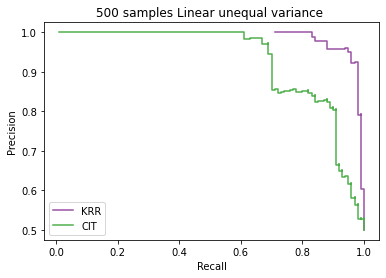

In [3]:
precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/LinearvarKRR500s100perm.csv", "./results/journal/simulation/nlcd/IndpKRR500s100perm.csv")
precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/Linearvar500cit100perm.csv", "./results/journal/simulation/cit/Indp500cit100perm.csv")
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
disp.plot(ax=ax, name="KRR", color=color_algo['KRR'])
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
plt.title("500 samples Linear unequal variance ")

Text(0.5, 1.0, '1000 samples Linear unequal variance ')

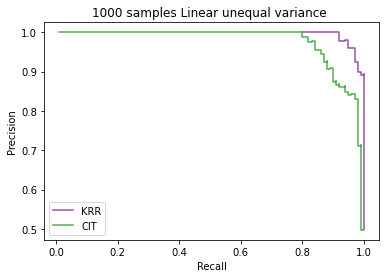

In [4]:
precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/LinearvarKRR1000s100perm.csv", "./results/journal/simulation/nlcd/IndpKRR500s100perm.csv")
precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/Linearvar1000cit100perm.csv", "./results/journal/simulation/cit/Indp500cit100perm.csv")
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
disp.plot(ax=ax, name="KRR", color=color_algo['KRR'])
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
plt.title("1000 samples Linear unequal variance ")

Text(0.5, 1.0, '300 samples Linear unequal variance ')

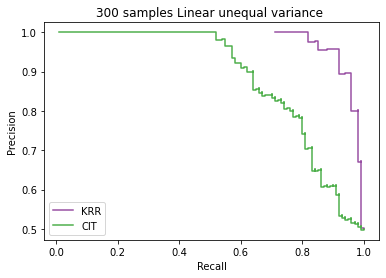

In [5]:
precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/simulation/nlcd/LinearvarKRR300s100perm.csv", "./results/journal/simulation/nlcd/IndpKRR500s100perm.csv")
precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/simulation/cit/Linearvar300cit100perm.csv", "./results/journal/simulation/cit/Indp500cit100perm.csv")
fig, ax = plt.subplots()
disp=PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
disp.plot(ax=ax, name="KRR", color=color_algo['KRR'])
disp=PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
disp.plot(ax=ax,name="CIT",color=color_algo['CIT'])
plt.title("300 samples Linear unequal variance ")